In [35]:
import pandas as pd
import numpy as np

csv_data = pd.read_csv('data_set.csv', sep=',')

Wir sehen einen Datensatz, welcher die Kriminalitätsdaten von Los Angeles enthält.

## Data Preparation

## Data Selection

Siehe Projektbericht

#### Row Selection

Im nächsten Schritt wird evaluiert, ob das Verwenden aller Records sinnhaft ist. Möglich wäre z.B., dass sich die Verbrechensmengen oder Typen über die Zeit verändert haben. Aus diesem Grund analysieren wir im nächsten Schritt, die Menge an Verbrechen pro Jahr in einem Bezirk und die häufig auftretenden Verbrechen pro Jahr in einem bestimmten Bezirk. Falls es große Abweichungen gibt, ist es möglich, dass bestimmte Datensätze nicht zur Analyse verwendet werden sollten.

In [36]:
# Reformat the date from String to Date
data_for_selection = csv_data.copy()
data_for_selection['DATE.OCC'] = pd.to_datetime(data_for_selection['DATE.OCC'])
data_for_selection['DATE.OCC'] = data_for_selection['DATE.OCC'].dt.date
# Create a sorted table
data_sorted_by_date_occ = data_for_selection.sort_values(by='DATE.OCC')
data_sorted_by_date_occ.head()

,Date.Rptd,DR.NO,DATE.OCC,TIME.OCC,AREA,AREA.NAME,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,LOCATION,Cross.Street,Location.1
236841,01/02/2012,120204045,2012-01-01,330,2,Rampart,216,997,TRAFFIC DR #,IC,Invest Cont,SUNSET BL,ALVARADO BL,"(34.0776, -118.2635)"
237315,11/10/2012,121120767,2012-01-01,800,11,Northeast,1127,354,THEFT OF IDENTITY,IC,Invest Cont,6300 N FIGUEROA ST,NaN,"(34.1155, -118.1843)"
237316,11/11/2012,121120799,2012-01-01,1200,11,Northeast,1117,354,THEFT OF IDENTITY,IC,Invest Cont,4600 EAGLE ROCK BL,NaN,"(34.1275, -118.2179)"
237317,11/24/2012,121121441,2012-01-01,1,11,Northeast,1119,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",IC,Invest Cont,1100 COLORADO BL,NaN,"(34.1374, -118.1897)"
237318,11/30/2012,121121757,2012-01-01,800,11,Northeast,1142,668,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",IC,Invest Cont,4500 FRANKLIN AV,NaN,"(34.1054, -118.2874)"


In [37]:
data_sorted_by_date_occ.tail()

,Date.Rptd,DR.NO,DATE.OCC,TIME.OCC,AREA,AREA.NAME,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,LOCATION,Cross.Street,Location.1
985589,12/03/2016,161200991,2016-12-03,1530,12,77th Street,1273,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",IC,Invest Cont,9113 S WESTERN AV,NaN,"(33.9545, -118.309)"
1103082,12/04/2016,161617056,2016-12-03,1230,16,Foothill,1651,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",IC,Invest Cont,13342 KELOWNA ST,NaN,"(34.2483, -118.423)"
1129618,12/03/2016,160326483,2016-12-03,1500,3,Southwest,397,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,IC,Invest Cont,4331 S BUDLONG AV,NaN,"(34.0055, -118.2959)"
982791,12/04/2016,161822319,2016-12-03,1830,18,Southeast,1837,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),IC,Invest Cont,1772 E 111TH PL,NaN,"(33.9339, -118.2434)"
967568,12/04/2016,160128347,2016-12-03,1615,1,Central,153,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",IC,Invest Cont,219 W 7TH ST,NaN,"(34.0445, -118.2523)"


- Zeitreihe geht vom 01.01.2012 bis zum 04.12.2016

<Axes: title={'center': 'Amount of crimes committed per year and area in Los Angeles'}, xlabel='AREA.NAME'>

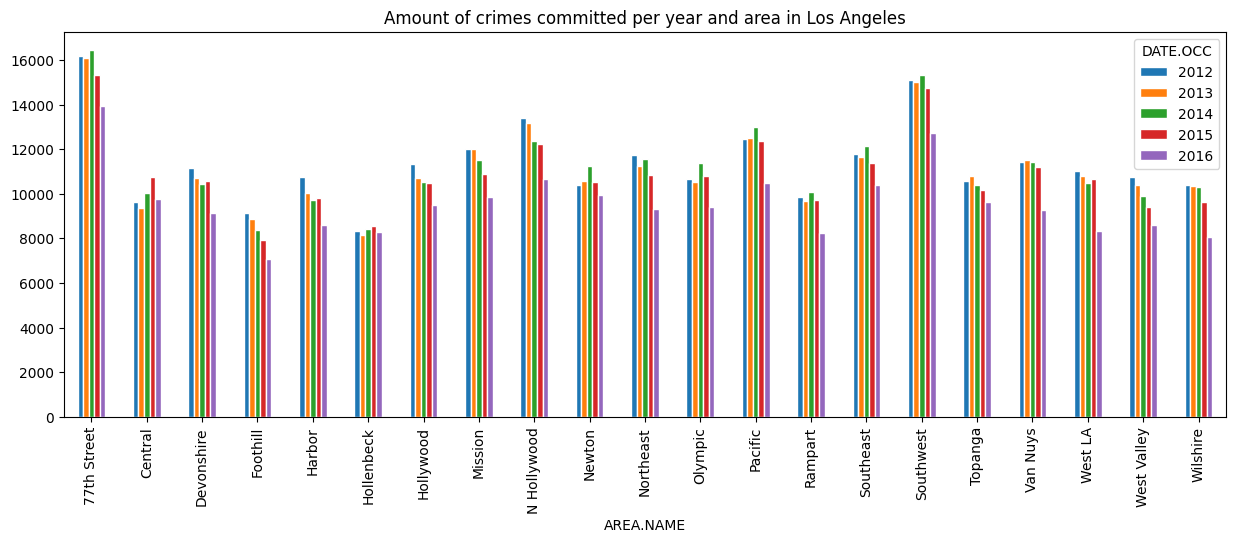

In [38]:
import datetime

# Create dataset with year instead of date
data_with_year = data_sorted_by_date_occ.copy()
data_with_year['DATE.OCC'] = pd.DatetimeIndex(data_sorted_by_date_occ['DATE.OCC']).year

only_date_and_area = data_with_year[['AREA.NAME','DATE.OCC','DR.NO']]
only_date_and_area.groupby(['AREA.NAME','DATE.OCC'])['DR.NO'].count().unstack('DATE.OCC').plot(kind='bar', title='Amount of crimes committed per year and area in Los Angeles', width=0.5, edgecolor='white', linewidth=1, figsize=(15, 5))


- auf dem Plot ist zu sehen, dass die Verbrechen über die Zeit rückläufig sind, jedoch in einem geringen Ausmaß
- auch zwischen den Städten keine großen Unterschiede, was den Trend betrifft

C:\Users\I586521\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\plotting\_matplotlib\core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


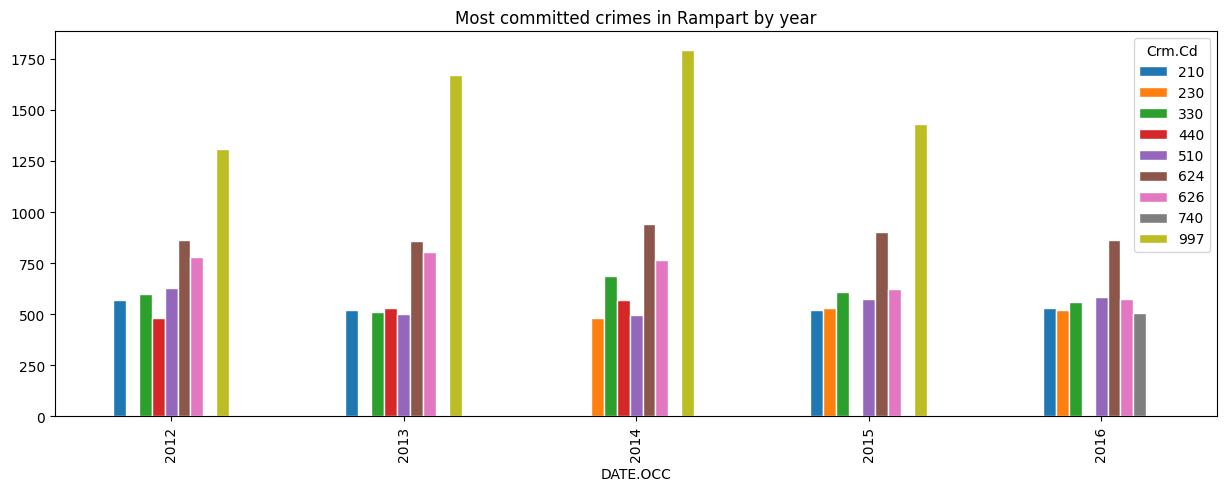

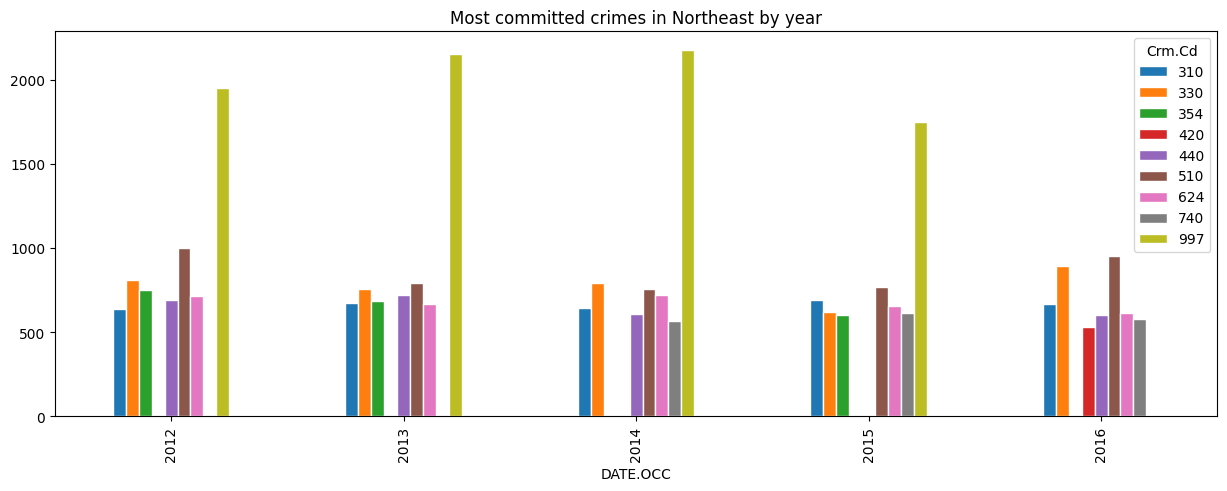

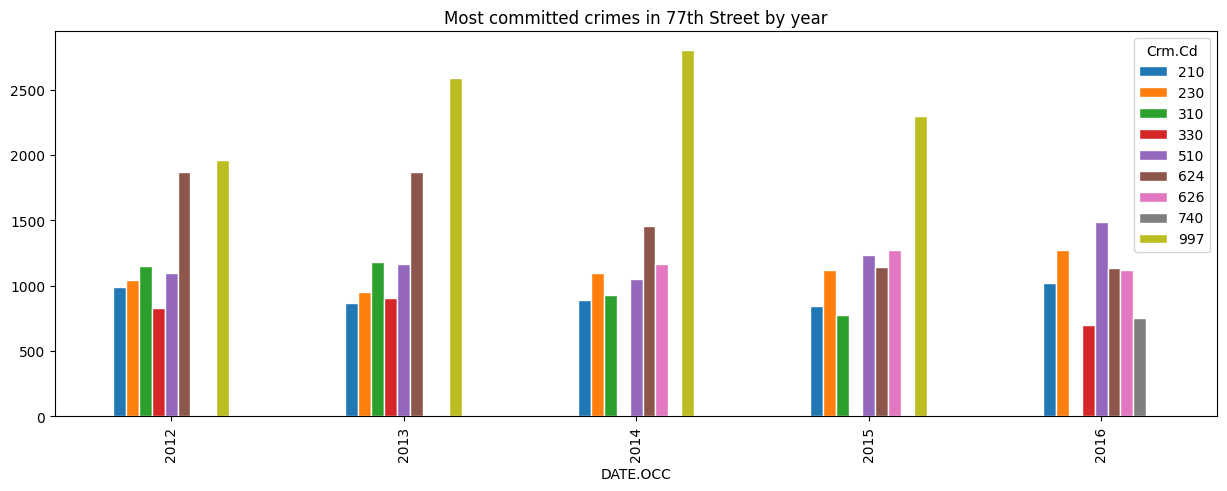

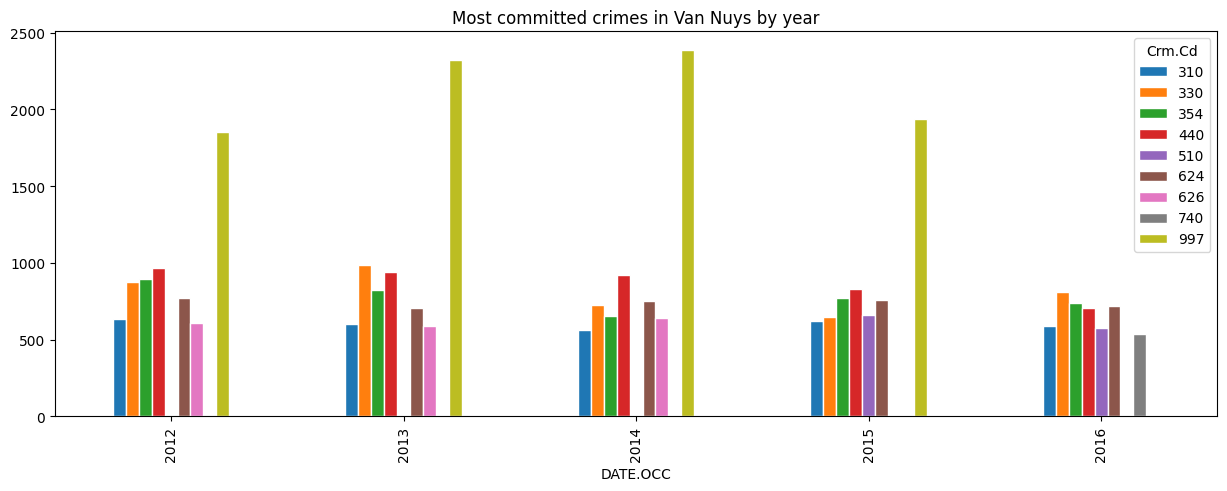

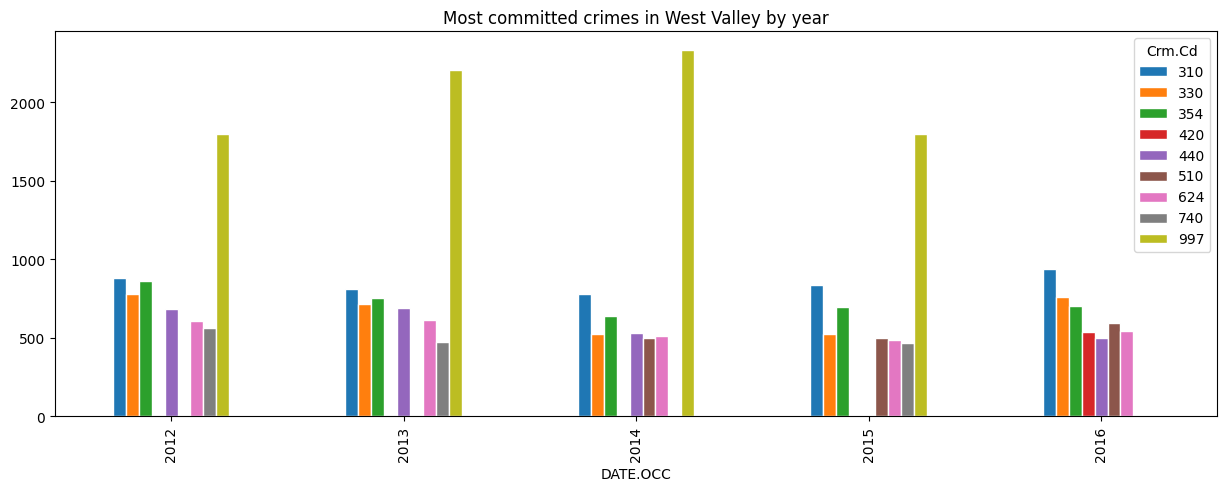

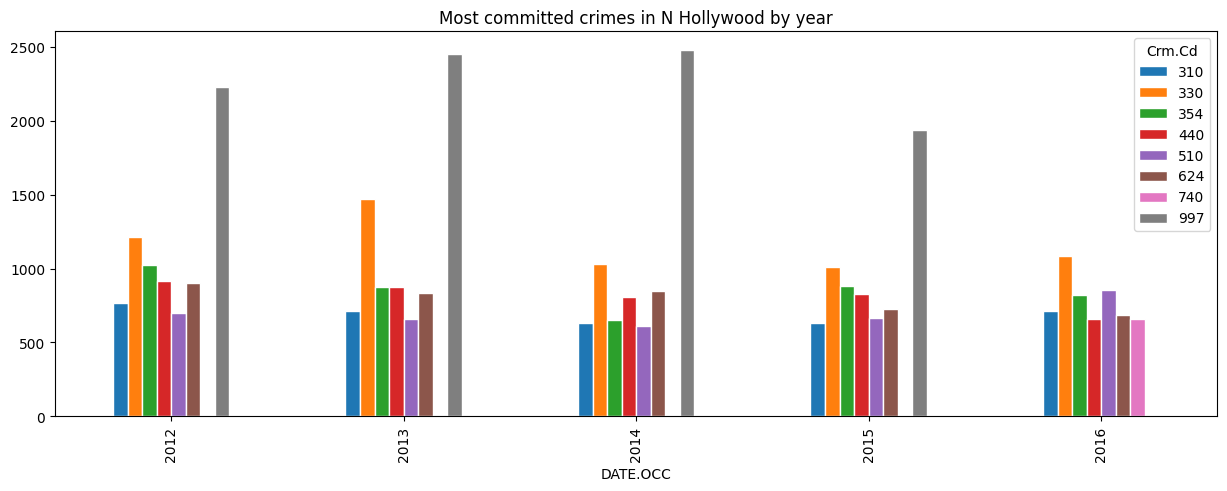

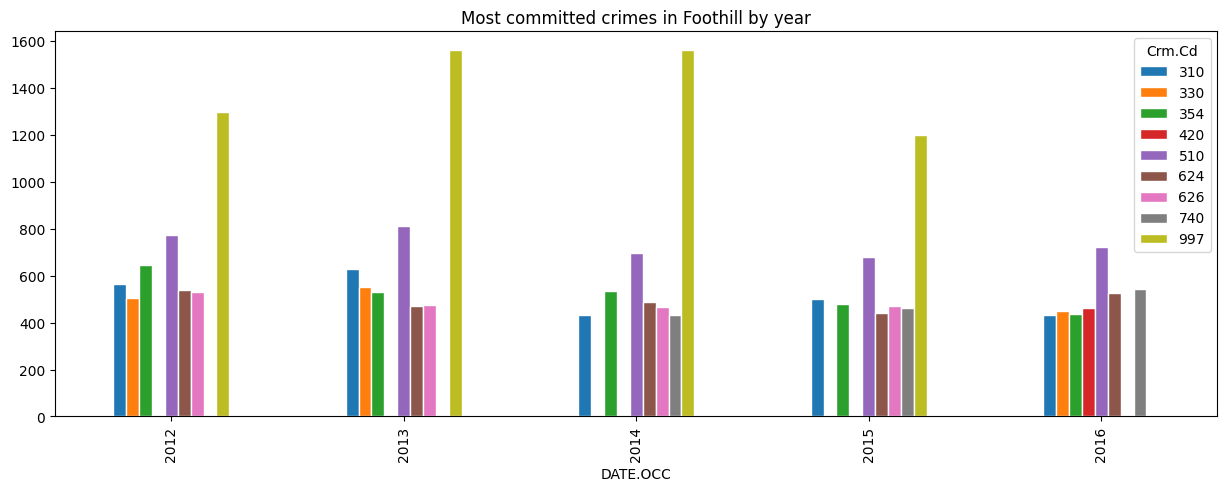

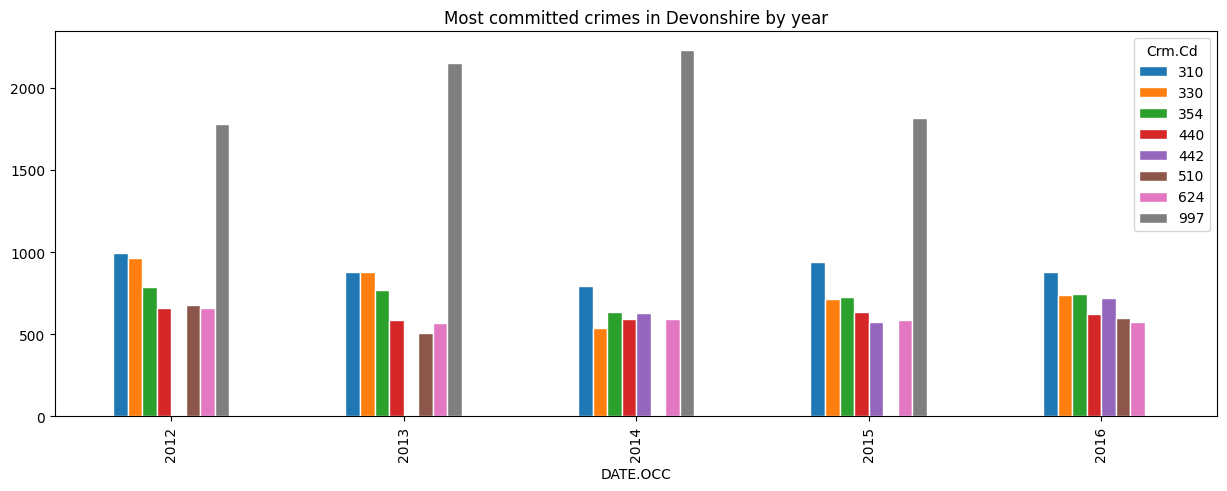

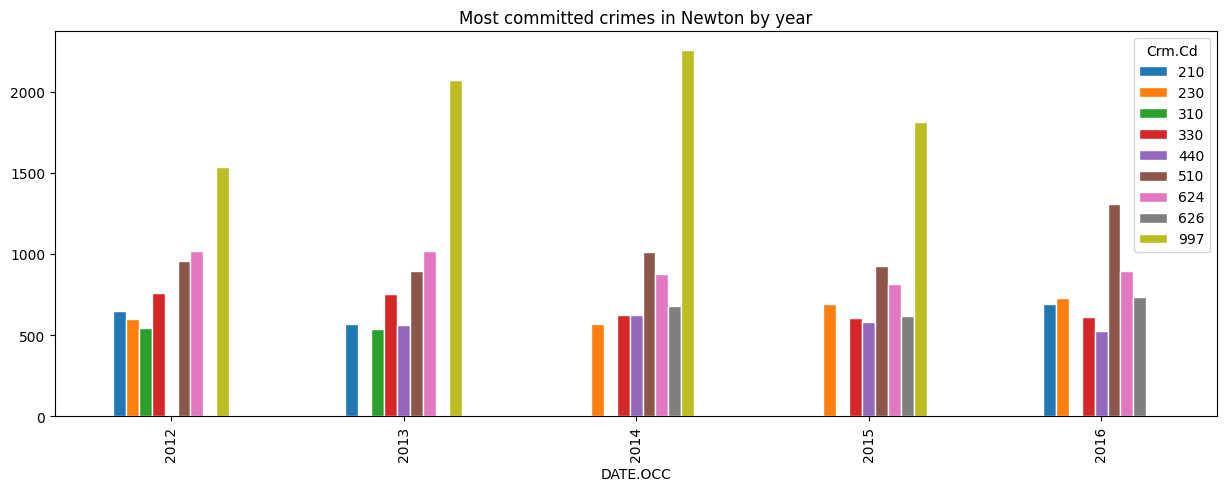

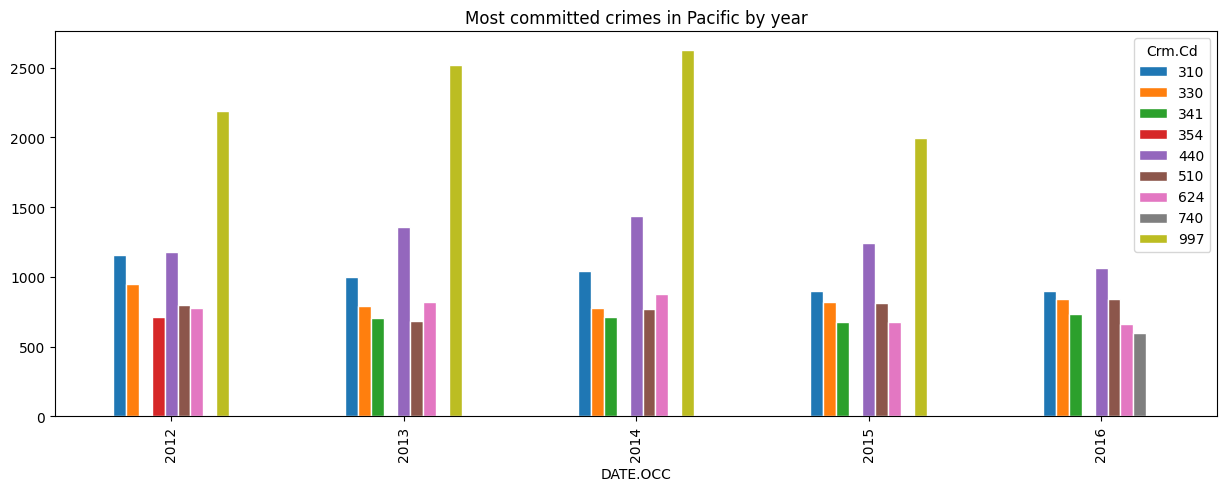

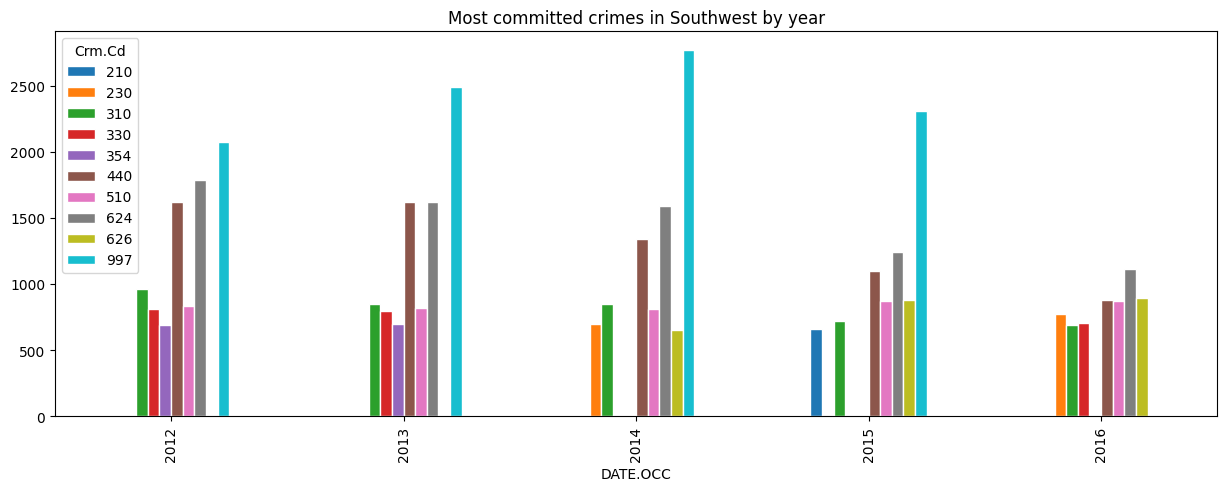

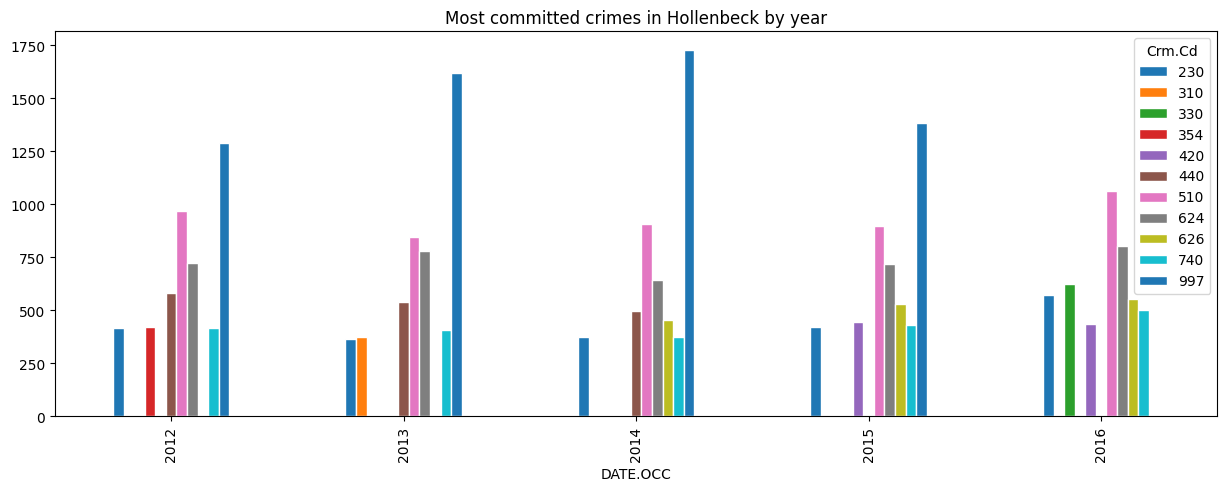

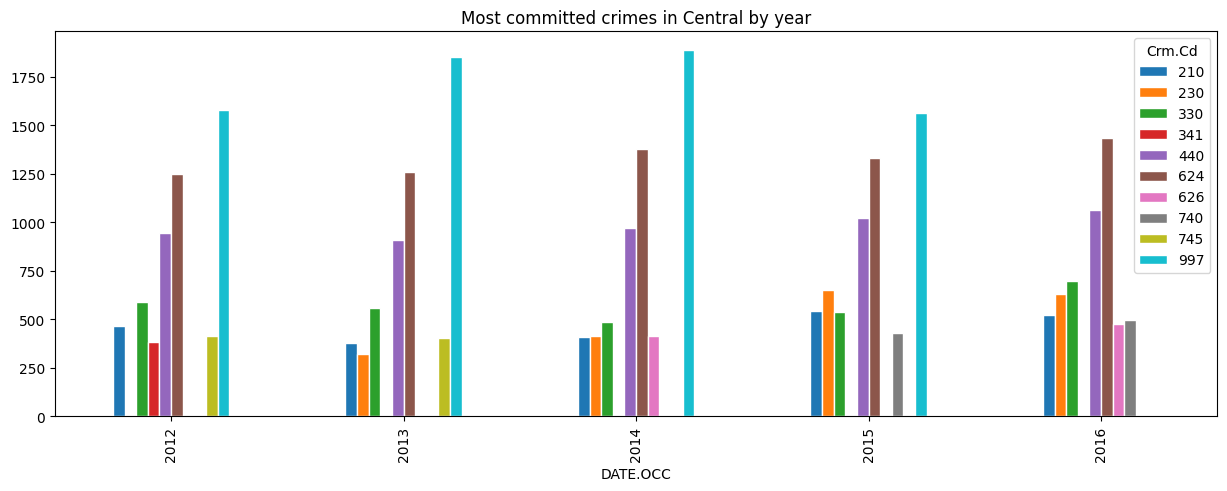

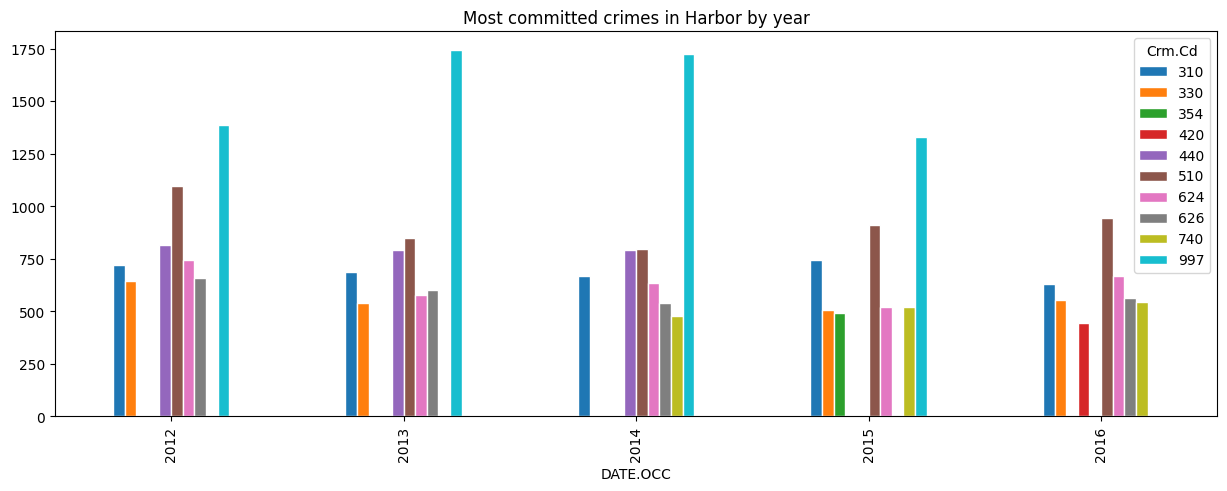

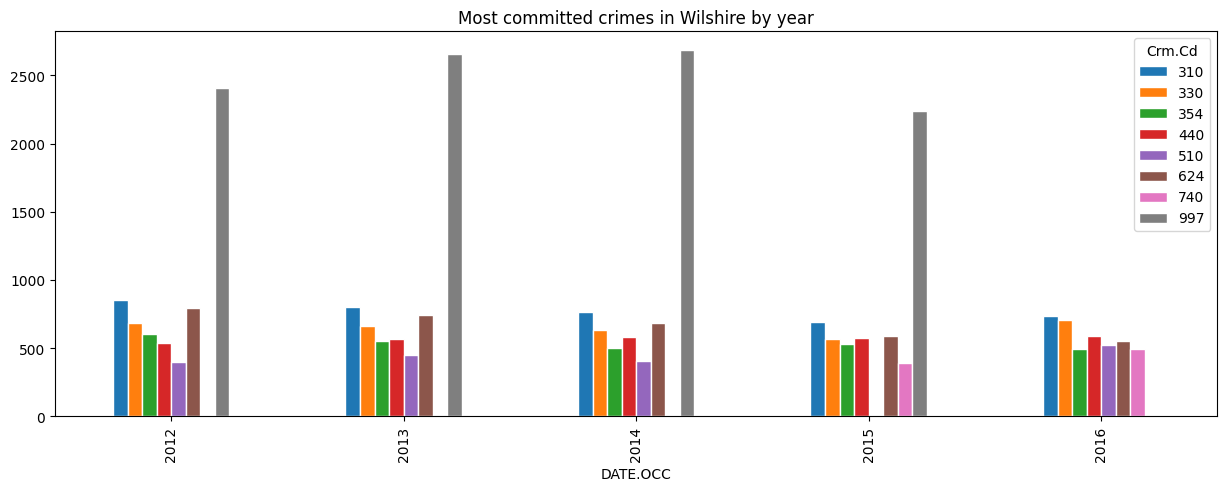

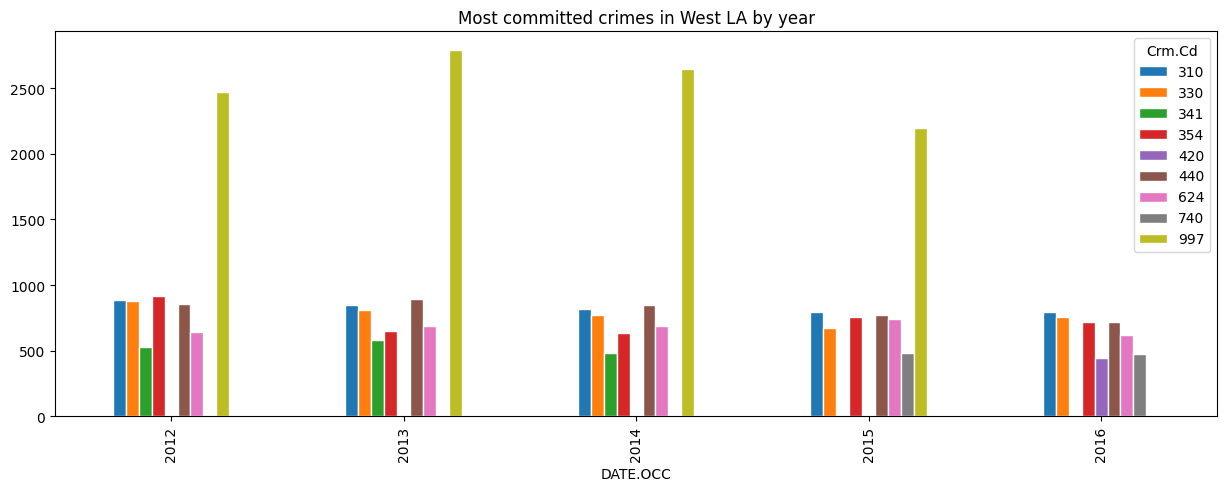

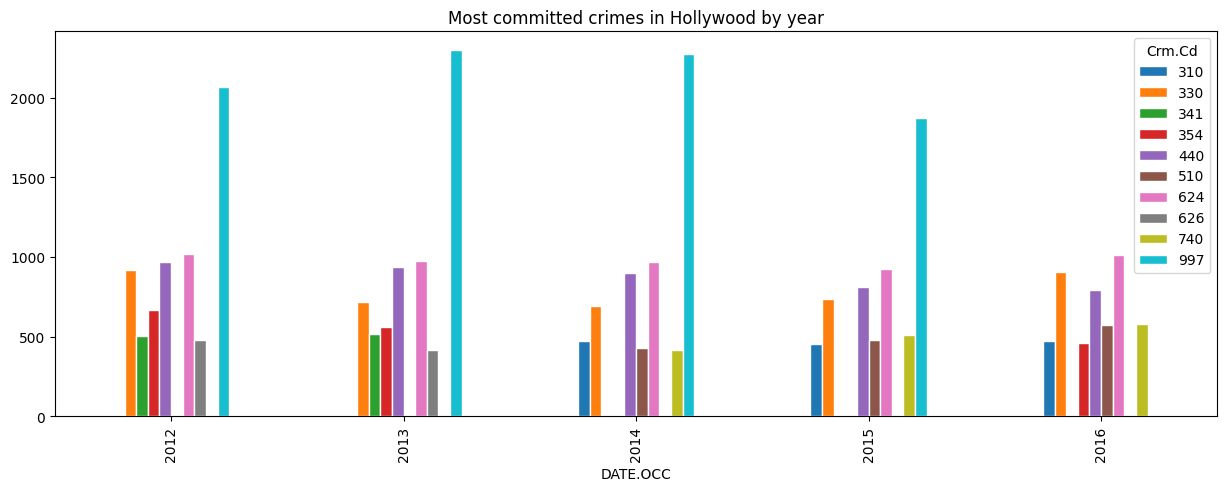

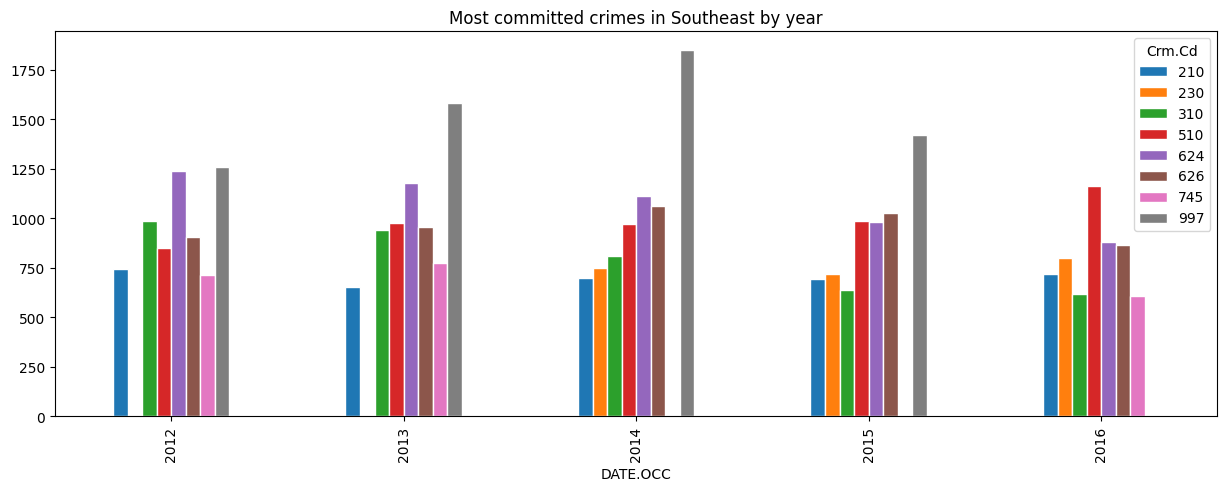

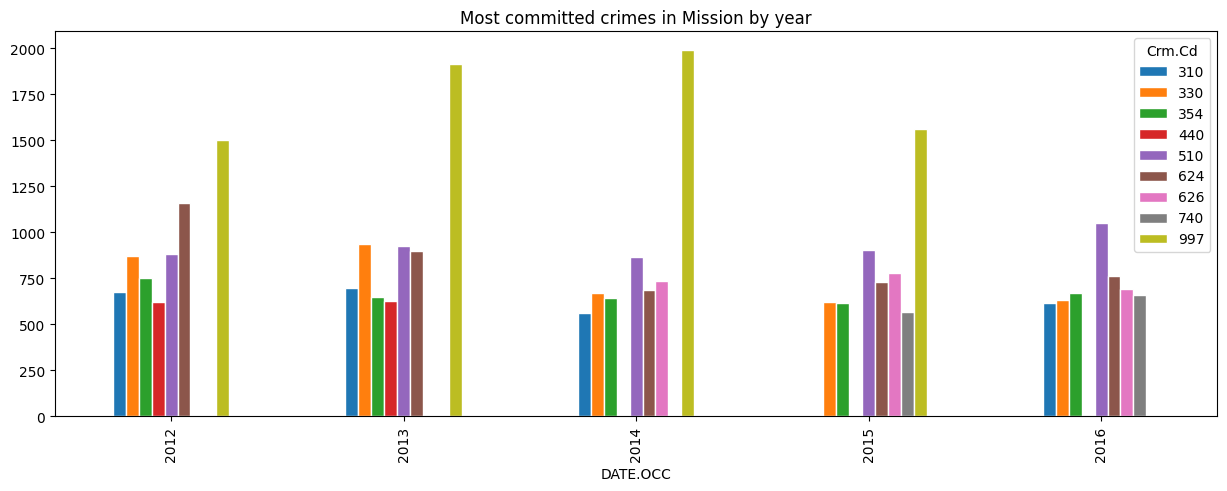

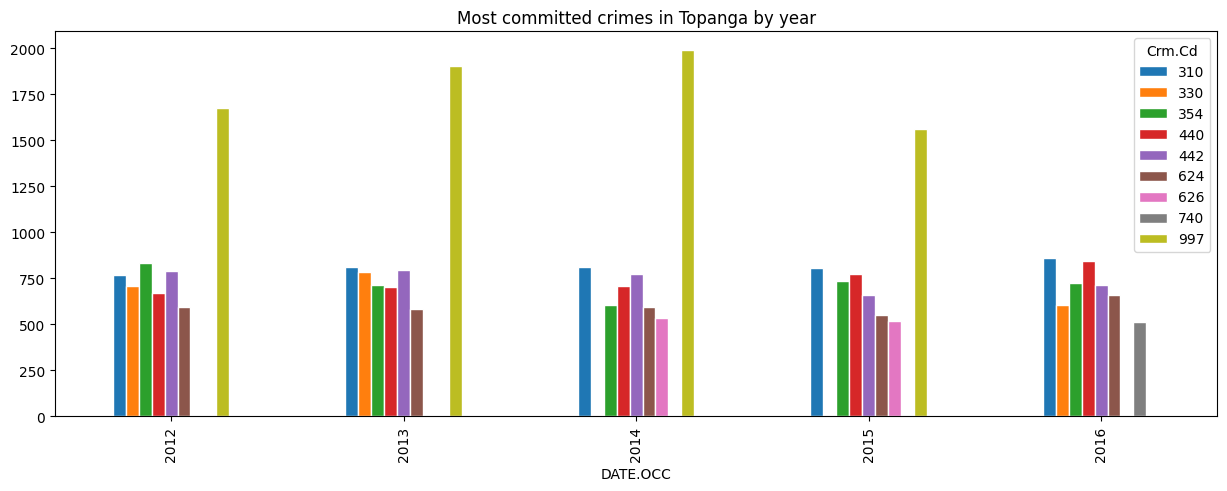

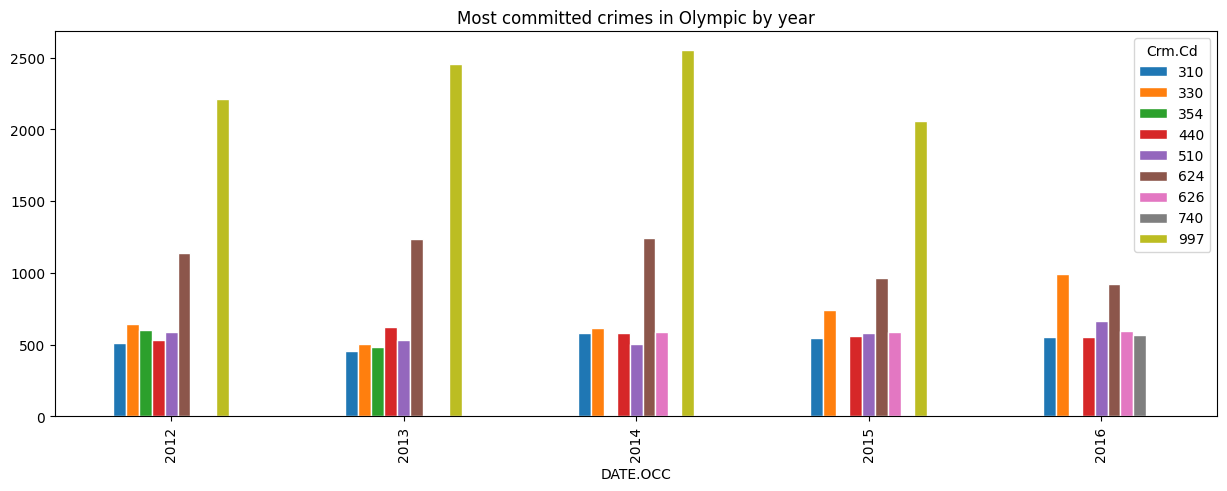

In [39]:
for area in data_with_year['AREA.NAME'].unique():
     data_in_this_area = data_with_year[(data_sorted_by_date_occ['AREA.NAME'] == area)]
     # Group by area and crime and count  
     data_in_this_area = data_in_this_area[['DATE.OCC','Crm.Cd','CrmCd.Desc', 'DR.NO']].groupby(['DATE.OCC','Crm.Cd'])['DR.NO'].count()
     data_in_this_area.groupby(level=0, group_keys=False).nlargest(7).unstack(['Crm.Cd']).plot(kind='bar', title=f'Most committed crimes in {area} by year', width=0.5, edgecolor='white', linewidth=1, figsize=(15, 5))

- Grafik zeigt häufigsten Verbrechen in einem Jahr pro Stadtbezirk
- zwischen den Jahren keine sehr großen Abweichungen (manchmal fallen Straftaten raus, aber nur, weil sie aus der Top 7 raus sind)
- was sehr auffällig ist: das Vergehen TRAFFIC DR# mit dem Code 997 tritt in allen Jahren in allen Bezirken von 2012 bis 2015 am häufigsten auf
- ab 2016 fehlt es jedoch -> dabei steht dieses Vergehen für einen nicht besuchten Gerichtstermin nach einem Verkehrsverstoß (z.B. Überschreiten der Geschwindigkeit)

In [40]:
data_with_year[(data_with_year['Crm.Cd'] == 997) & (data_with_year['DATE.OCC'] >= 2016)]

,Date.Rptd,DR.NO,DATE.OCC,TIME.OCC,AREA,AREA.NAME,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,LOCATION,Cross.Street,Location.1


- Test zeigt: tatsächlich existiert dieser Datensatz für 2016 nicht
- es muss im Data Cleaning untersucht werden, was genau die Ursache hierfür ist
- um sicherzugehen, dass dieses Problem nicht für alle Daten vorliegt, wird im nächsten Schritt die Häufigkeit aller Straftaten pro Jahr tabellarisch gezeigt

In [41]:
from IPython.display import display, HTML

display(HTML(data_with_year[['DATE.OCC','CrmCd.Desc','Crm.Cd','DR.NO']].groupby(['Crm.Cd','CrmCd.Desc','DATE.OCC']).count().to_html()))


- 903 starker Anstieg in 2015
- 930 in 2014 fast komplett weg
- 997 in 2016 komplett am Fehlen
- Fehlende Daten in Dez 2015 & 2016 (aus Beschreibung des Datensatzes)

- Rest der Daten 'in Ordnung'
- über die Zeit hat sich die Häufigkeit bestimmter Vergehen verändert aber alles im erwartbaren Bereich
- eine Möglichkeit wäre z.B., dass sich der Code verändert hat, allerdings werden die Ausschläge durch keines der anderen Werte ausgeglichen
- hierauf muss im Data Cleaning genauer eingegangen werden

- was außerdem auffällt: 2013 wurden viele Vergehen einmalig umbenannt, um dann im nächsten Jahr wieder die alten Kennzeichnungen zu verwenden

Wir kommen zu dem Schluss, dass alle Zeilen für die weitere Analyse verwendet werden können, da die erkennbaren Veränderungen über die Jahre zu vernachlässigen sind.

### Data Cleaning
In diesem Abschnitt werden die Daten aufgeräumt. Dabei werden vor allem Datenformate der Rohdaten an Konventionen angepasst und gleichzeitig werden fehlende Einträge ersetzt bzw ergänzt. 

1. Format-Fixes
- die Spalten `Date.Rptd` und `DATE.OCC` enthalten Daten des Types `Date`, jedoch ist ihre Formatierung ungewöhnlich
- deshalb werden die Einträge zum Typ `Date` umgewandelt
- die Spalte `TIME.OCC` enthält einen String im folgenden Format: `HHMM`, wobei ein `Timestamp` eher so formatiert sein sollte: `HH:MM:SS`

In [42]:
# First: create a copy of the raw data
cleaned_data = csv_data.copy()

In [43]:
cleaned_data['Date.Rptd'] = pd.to_datetime(cleaned_data['Date.Rptd'])
cleaned_data['Date.Rptd'] = cleaned_data['Date.Rptd'].dt.date
cleaned_data['DATE.OCC'] = pd.to_datetime(cleaned_data['DATE.OCC'])
cleaned_data['DATE.OCC'] = cleaned_data['DATE.OCC'].dt.date

from datetime import time
def time_formatter(time_raw):
    time_raw_str = str(time_raw)
    if len(time_raw_str) <= 2:
        # It's 12am
        time_formatted = time(hour=0, minute=time_raw)
    else:
        type(len(time_raw_str)/2)
        time_formatted = time(hour=int(time_raw_str[:int(len(time_raw_str)/2)]), minute=int(time_raw_str[int(len(time_raw_str)/2):]))
    return time_formatted

cleaned_data['TIME.OCC'] = cleaned_data['TIME.OCC'].map(time_formatter)

- die Spalte `Location.1` enthält die Koordinaten des Verbrechens in einem String mit diesem Format: `(LAT, LONG)`
- dabei sollten `LAT` und `LONG` einzelne Spalten repräsentieren, da sie einen zusammengesetzten Wert repräsentieren

In [44]:
def lat_formatter(coordinate) :
    if len(str(coordinate).split(',')) > 1:
        return float(str(coordinate).split(',')[0].replace('(', ''))
    return None
cleaned_data['LAT'] = cleaned_data['Location.1'].map(lat_formatter)

def long_formatter(coordinate) :
    if len(str(coordinate).split(',')) > 1:
        return float(str(coordinate).split(',')[1].replace(')', ''))
    return None

cleaned_data['LONG'] = cleaned_data['Location.1'].map(long_formatter)
cleaned_data = cleaned_data.drop(columns=['Location.1'])
cleaned_data

,Date.Rptd,DR.NO,DATE.OCC,TIME.OCC,AREA,AREA.NAME,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,LOCATION,Cross.Street,LAT,LONG
0,2013-03-20,132007717,2013-03-20,20:15:00,20,Olympic,2004,997,TRAFFIC DR #,UNK,Unknown,OXFORD,OAKWOOD,34.0776,-118.3080
1,2013-03-10,130608787,2013-03-10,04:45:00,6,Hollywood,635,997,TRAFFIC DR #,UNK,Unknown,ODIN ST,CAHUENGA BL,34.1113,-118.3336
2,2013-12-18,131820260,2013-12-18,07:45:00,18,Southeast,1839,997,TRAFFIC DR #,UNK,Unknown,105TH ST,CROESUS AV,33.9406,-118.2338
3,2013-10-18,131817514,2013-10-18,17:30:00,18,Southeast,1827,997,TRAFFIC DR #,UNK,Unknown,101ST ST,JUNIPER ST,33.9449,-118.2332
4,2013-05-26,130510483,2013-05-25,20:00:00,5,Harbor,507,440,THEFT PLAIN - PETTY (UNDER $400),UNK,Unknown,1300 W SEPULVEDA BL,NaN,33.8135,-118.2992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136584,2016-05-01,162010003,2016-04-30,22:00:00,20,Olympic,2069,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",IC,Invest Cont,1155 ELDEN AV,NaN,34.0508,-118.2877
1136585,2016-06-29,160315990,2016-06-29,10:20:00,3,Southwest,353,946,OTHER MISCELLANEOUS CRIME,IC,Invest Cont,3745 S VICTORIA AV,NaN,34.0199,-118.3363
1136586,2016-05-01,161200696,2016-05-01,20:30:00,12,77th Street,1256,626,SPOUSAL(COHAB) ABUSE - SIMPLE ASSAULT,IC,Invest Cont,943 W 75TH ST,NaN,33.9717,-118.2893
1136587,2016-09-05,161015111,2016-09-05,08:00:00,10,West Valley,1017,440,THEFT PLAIN - PETTY ($950 & UNDER),IC,Invest Cont,7545 BALBOA BL,NaN,34.2067,-118.5014


- weiterhin haben Einträge der Spalten `LOCATION` und `Cross.Street` zu viele Leerzeichen
- hier müssen überflüssige Leerzeichen entfernt werden

In [45]:
def remove_whitespaces(street_name):
    street_name = ' '.join(str(street_name).strip().split())
    if street_name == 'nan':
        return None
    return street_name

cleaned_data['LOCATION'] = cleaned_data['LOCATION'].map(remove_whitespaces)
cleaned_data['Cross.Street'] = cleaned_data['Cross.Street'].map(remove_whitespaces)

In [46]:
print(sorted(list(set(cleaned_data['LOCATION'].to_list())), reverse=True)[:100])
def has_house_number(address):
    if address is None:
        return False
    return address.split()[0].isnumeric()

print(len(list(filter(has_house_number, list(set(cleaned_data['LOCATION'].to_list()))))))
# We try to remove the house number from each street
def remove_house_number(address):
    if has_house_number(address):
        address = ' '.join(address.split()[1:])
        if len(address) == 0:
            return None
    return address
print(list(set(map(remove_house_number, set(cleaned_data['LOCATION'].to_list()))))[:300])
# Seems like it is working. We should seperate street name and house number

['ZOO DR', 'ZOO', 'ZONAL ST', 'ZONAL AV', 'ZONAL', 'ZOMBAR AV', 'ZOMBAR', 'ZITOLA TR', 'ZEUS DR', 'ZEPHYR CT', 'ZEPHYR AV', 'ZENO PL', 'ZENO AV', 'ZELZAH ST', 'ZELZAH AV', 'ZELZAH', 'ZELDA AV', 'ZELDA', 'ZEILER AV', 'ZEILER', 'ZANJA ST', 'ZANJA BL', 'ZANJA AV', 'ZANJA', 'ZANE ST', 'ZANE', 'ZAMORA ST', 'ZAMORA AV', 'ZAMORA', 'YUMA', 'YUCCA TR', 'YUCCA TL', 'YUCCA ST', 'YUCCA BL', 'YUCCA AV', 'YUCCA', 'YUCATAN ST', 'YOUNGWORTH', 'YOUNGDALE AV', 'YOUNGDALE', 'YOUNG ST', 'YOUNG', 'YOSEMITE DR', 'YOSEMITE CI', 'YOSEMITE', 'YORKTOWN AV', 'YORKSHIRE AV', 'YORKSHIRE', 'YORK ST', 'YORK BLVD BL', 'YORK BL', 'YORK AV', 'YORK', 'YOLANDA ST', 'YOLANDA AV', 'YOLANDA', 'YOAKUM ST', 'YOAKUM DR', 'YNEZ', 'YELLOWSTONE ST', 'YELLOWSTONE', 'YBARRA ST', 'YBARRA RD', 'YARNELL ST', 'YARNELL', 'YARMOUTH ST', 'YARMOUTH AV', 'YARMOUTH', 'YALE ST', 'YALE', 'YACHT LAND', 'WYTON AV', 'WYSTONE ST', 'WYSTONE AV', 'WYSTONE', 'WYOMING', 'WYNNE AV', 'WYNNE', 'WYNKOOP', 'WYNGATE ST', 'WYNGATE', 'WYCLIFF AV', 'WYANODOTTE

- es ist aufgefallen, dass `LOCATION` und `Cross.Street` teilweise Hausnummern haben
- Vermutung ist, dass diese, wenn dann immer vorangestellt sind
- Wir wollen natürlich die getrennten Informationen in getrennte Attribute verpacken

In [47]:
def get_house_number(address):
    if has_house_number(address):
        return address.split(' ')[0]
    return None

cleaned_data['LOCATION.house_number'] = cleaned_data['LOCATION'].map(get_house_number)
cleaned_data['LOCATION.street'] = cleaned_data['LOCATION'].map(remove_house_number)
cleaned_data['Cross.Street.house_number'] = cleaned_data['Cross.Street'].map(get_house_number)
cleaned_data['Cross.Street.street'] = cleaned_data['Cross.Street'].map(remove_house_number)
cleaned_data.drop(columns=['LOCATION','Cross.Street'], inplace=True)
cleaned_data

,Date.Rptd,DR.NO,DATE.OCC,TIME.OCC,AREA,AREA.NAME,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,LAT,LONG,LOCATION.house_number,LOCATION.street,Cross.Street.house_number,Cross.Street.street
0,2013-03-20,132007717,2013-03-20,20:15:00,20,Olympic,2004,997,TRAFFIC DR #,UNK,Unknown,34.0776,-118.3080,None,OXFORD,None,OAKWOOD
1,2013-03-10,130608787,2013-03-10,04:45:00,6,Hollywood,635,997,TRAFFIC DR #,UNK,Unknown,34.1113,-118.3336,None,ODIN ST,None,CAHUENGA BL
2,2013-12-18,131820260,2013-12-18,07:45:00,18,Southeast,1839,997,TRAFFIC DR #,UNK,Unknown,33.9406,-118.2338,None,105TH ST,None,CROESUS AV
3,2013-10-18,131817514,2013-10-18,17:30:00,18,Southeast,1827,997,TRAFFIC DR #,UNK,Unknown,33.9449,-118.2332,None,101ST ST,None,JUNIPER ST
4,2013-05-26,130510483,2013-05-25,20:00:00,5,Harbor,507,440,THEFT PLAIN - PETTY (UNDER $400),UNK,Unknown,33.8135,-118.2992,1300,W SEPULVEDA BL,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136584,2016-05-01,162010003,2016-04-30,22:00:00,20,Olympic,2069,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",IC,Invest Cont,34.0508,-118.2877,1155,ELDEN AV,None,None
1136585,2016-06-29,160315990,2016-06-29,10:20:00,3,Southwest,353,946,OTHER MISCELLANEOUS CRIME,IC,Invest Cont,34.0199,-118.3363,3745,S VICTORIA AV,None,None
1136586,2016-05-01,161200696,2016-05-01,20:30:00,12,77th Street,1256,626,SPOUSAL(COHAB) ABUSE - SIMPLE ASSAULT,IC,Invest Cont,33.9717,-118.2893,943,W 75TH ST,None,None
1136587,2016-09-05,161015111,2016-09-05,08:00:00,10,West Valley,1017,440,THEFT PLAIN - PETTY ($950 & UNDER),IC,Invest Cont,34.2067,-118.5014,7545,BALBOA BL,None,None


- die Zeitdaten werden als Timestamps gespeichert
- um jedoch Zusammenhänge z.B. auf Tagesebene zu finden, müssen auch hier die einzelnen Infos aus dem Zusammengesetzten Attribut entzogen werden

In [48]:
def timestamp_to_unix_mapper(row):
    date = row['DATE.OCC']
    timestamp = row['TIME.OCC']
    return datetime.datetime(year=date.year, month=date.month, day=date.day, hour=timestamp.hour, minute=timestamp.minute).timestamp()

def to_hour(time):
    return time.hour

def to_day(date):
    return date.day

def to_month(date):
    return date.month

def to_year(date):
    return date.year

def to_weekday(date):
    return date.weekday()

def to_weekend(date):
    if date.weekday() >= 5:
        return 1
    return 0
#Transform timestamp to total milliseconds
cleaned_data['UNIX.TIMESTAMP'] = cleaned_data.apply(timestamp_to_unix_mapper, axis=1)
# Extract Date and time information
cleaned_data['TIME.OCC_hour'] = cleaned_data['TIME.OCC'].map(to_hour)
cleaned_data['DATE.OCC_day'] = cleaned_data['DATE.OCC'].map(to_day)
cleaned_data['DATE.OCC_weekday'] = cleaned_data['DATE.OCC'].map(to_weekday)
cleaned_data['DATE.OCC_weekend'] = cleaned_data['DATE.OCC'].map(to_weekend)
cleaned_data['DATE.OCC_month'] = cleaned_data['DATE.OCC'].map(to_month)
cleaned_data['DATE.OCC_year'] = cleaned_data['DATE.OCC'].map(to_year)

# for time_tup in cleaned_data[['DATE.OCC','TIME.OCC']].values:
#     datetime.datetime(year=time_tup[0].year, month=time_tup[0].month, day=time_tup[0].day, hour=time_tup[1].hour, minute=time_tup[1].minute).timestamp()


2. Missing Values
- suche fehlende Werte


In [49]:
#Search for Missing values
null_rows = csv_data[csv_data.isnull().any(axis=1)]
print(f'Total null rows: {len(null_rows)}')
without_cross_street = null_rows[null_rows['Cross.Street'].notnull()]
print(f'Cross.Street null values: {len(null_rows) - len(without_cross_street)}')
without_location = without_cross_street[without_cross_street['Location.1'].notnull()]
print(f'Location.1 null values: {len(without_cross_street) - len(without_location)}')
print(f'CrmCd.Desc null values: {len(without_location)}')

Total null rows: 820209
Cross.Street null values: 816574
Location.1 null values: 3565
CrmCd.Desc null values: 70


- einige Werte fehlen
- bei der Spalte `Cross.Street` fehlen unter ca. 1136000 Daten 816574
- eine Untersuchung der betroffenen Einträge mit den Koordinaten hat ergeben, dass diese Werte `Completely missing at random (MCAR)` sind, da einige Einträge in der Nähe einer Kreuzung sind und wiederrum andere nicht
- Werte könnten theoretisch durch die Koordinaten ersetzt werden
- dies wäre jedoch relativ aufwendig und da die Werte MCAR sind, kann es auch sein, dass der Wert `Cross.Street` mit Absicht Missing ist, da das Verbrechen nicht in der Nähe einer Kreuzung passiert ist
- es empfiehlt sich also, die Werte von `Cross.Street` für die Analyse gänzlich zu ignorieren, da die Qualität der Daten hier zu schlecht ist

In [50]:
cleaned_data.sort_values(by=['LAT', 'LONG'])

,Date.Rptd,DR.NO,DATE.OCC,TIME.OCC,AREA,AREA.NAME,RD,Crm.Cd,CrmCd.Desc,Status,...,LOCATION.street,Cross.Street.house_number,Cross.Street.street,UNIX.TIMESTAMP,TIME.OCC_hour,DATE.OCC_day,DATE.OCC_weekday,DATE.OCC_weekend,DATE.OCC_month,DATE.OCC_year
328,2012-12-31,120630653,2012-12-31,13:00:00,6,Hollywood,622,330,BURGLARY FROM VEHICLE,IC,...,MULHOLLAND DR,None,LAUREL,1.356955e+09,13,31,0,0,12,2012
351,2012-12-31,120818974,2012-12-31,15:35:00,8,West LA,889,997,TRAFFIC DR #,IC,...,GUTHERIE AV,None,SHERBOURNE DR,1.356964e+09,15,31,0,0,12,2012
385,2012-12-31,121228697,2012-12-31,01:30:00,12,77th Street,1243,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",IC,...,61ST ST,None,WESTERN AV,1.356914e+09,1,31,0,0,12,2012
402,2012-12-31,121324820,2012-12-31,15:15:00,13,Newton,1341,997,TRAFFIC DR #,AA,...,BROADWAY,None,MLK,1.356963e+09,15,31,0,0,12,2012
506,2013-01-01,130304031,2012-12-31,23:30:00,3,Southwest,331,330,BURGLARY FROM VEHICLE,IC,...,WEST VIEW ST,None,None,1.356993e+09,23,31,0,0,12,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707049,2014-09-07,142115167,2014-09-07,02:00:00,21,Topanga,2157,626,SPOUSAL(COHAB) ABUSE - SIMPLE ASSAULT,AA,...,DE SOTO,None,WINNETKA,1.410048e+09,2,7,6,1,9,2014
707106,2014-09-04,141220122,2014-08-31,19:30:00,12,77th Street,1232,946,OTHER MISCELLANEOUS CRIME,IC,...,WEST BL,None,None,1.409506e+09,19,31,6,1,8,2014
707150,2014-08-30,141220805,2014-08-16,20:00:00,12,77th Street,1211,922,CHILD STEALING,IC,...,WEST BL,None,None,1.408212e+09,20,16,5,1,8,2014
707213,2014-08-11,140712536,2014-08-11,17:10:00,7,Wilshire,724,997,TRAFFIC DR #,IC,...,BEVERLY,None,GROVE,1.407770e+09,17,11,0,0,8,2014


- einige Koordinaten sind (0, 0) -> diese fehlen auch!

In [51]:
def zero_to_null_mapper(x):
    if x == 0:
        return None
    return x

cleaned_data['LAT'] = cleaned_data['LAT'].map(zero_to_null_mapper)
cleaned_data['LONG'] = cleaned_data['LONG'].map(zero_to_null_mapper)
#cleaned_data[(cleaned_data['LAT'].isnull() | cleaned_data['LONG'].isnull()) & cleaned_data['Status'] == 'IC']
#cleaned_data[cleaned_data['Status'] == 'IC']
cleaned_data[(cleaned_data['LAT'].isnull() | cleaned_data['LONG'].isnull()) & cleaned_data['Cross.Street.street'].notnull()]

,Date.Rptd,DR.NO,DATE.OCC,TIME.OCC,AREA,AREA.NAME,RD,Crm.Cd,CrmCd.Desc,Status,...,LOCATION.street,Cross.Street.house_number,Cross.Street.street,UNIX.TIMESTAMP,TIME.OCC_hour,DATE.OCC_day,DATE.OCC_weekday,DATE.OCC_weekend,DATE.OCC_month,DATE.OCC_year
147,2014-05-21,141100729,2014-05-21,05:20:00,11,Northeast,1153,122,"RAPE, ATTEMPTED",IC,...,LOS FELIZ,None,FERNDALE,1.400642e+09,5,21,2,0,5,2014
157,2014-05-07,141810318,2014-05-07,17:45:00,18,Southeast,1805,997,TRAFFIC DR #,IC,...,ST,None,AVALON,1.399478e+09,17,7,2,0,5,2014
203,2014-09-06,141422705,2014-09-06,09:40:00,14,Pacific,1493,997,TRAFFIC DR #,IC,...,VISTA DEL MAR,None,HESPERIAN WY,1.409989e+09,9,6,5,1,9,2014
328,2012-12-31,120630653,2012-12-31,13:00:00,6,Hollywood,622,330,BURGLARY FROM VEHICLE,IC,...,MULHOLLAND DR,None,LAUREL,1.356955e+09,13,31,0,0,12,2012
351,2012-12-31,120818974,2012-12-31,15:35:00,8,West LA,889,997,TRAFFIC DR #,IC,...,GUTHERIE AV,None,SHERBOURNE DR,1.356964e+09,15,31,0,0,12,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134694,2016-10-16,161225567,2016-10-16,11:50:00,12,77th Street,1203,210,ROBBERY,IC,...,WESTERN AV,None,45TH ST,1.476611e+09,11,16,6,1,10,2016
1135110,2016-02-05,161805832,2016-02-05,16:45:00,18,Southeast,1838,624,BATTERY - SIMPLE ASSAULT,IC,...,SANTA ANA N,None,WILLOWBROOK,1.454687e+09,16,5,4,0,2,2016
1135219,2016-10-11,160621569,2016-10-11,17:55:00,6,Hollywood,678,762,LEWD CONDUCT,IC,...,HARVARD AV,None,LEMON GROVE AV,1.476201e+09,17,11,1,0,10,2016
1135533,2016-10-31,160622780,2016-10-30,17:45:00,6,Hollywood,637,330,BURGLARY FROM VEHICLE,IC,...,CARLOS AV,None,BRONSON AV,1.477846e+09,17,30,6,1,10,2016


- zusammen mit den (0,0) Koordinaten fehlen insgesamt für 13011 Einträge die Koordinaten
- auffällig: für alle diese Einträge steht der Status `IC`
- allerdings: insgesamt haben 916146 Einträge den Status `IC` (über 80%)
- Wahrscheinlichkeit ist also hoch, dass das einfach Zufall ist
- damit sind diese Daten ebenfalls `MCAR`
- diese Daten könnten jedoch zumindest teilweise gerettet werden
- so könnte das Tupel (`LOCATION`,`Cross.Street`) genutzt werden, um die Koordinaten vorherzusagen
- kommt jedoch darauf an, wie viele Doppelungen der Tupel es gibt
- zuletzt wurden auch einige fehlende Daten in der Spalte `CrmCd.Desc` festgestellt

In [52]:
set(cleaned_data[cleaned_data['CrmCd.Desc'].isnull()]['Crm.Cd'].values)

{760, 814, 822, 921}

- dabei handelt es sich um diese vier Verbrechenscodes: 760, 814, 822, 921
- für keiner dieser Codes existiert ein `CrmCd.Desc` in der Tabelle, deshalb `Missing at random (MAR)`
- da dies jedoch nur 70 Einträge betrifft, ist davon auszugehen, dass dies Nischenverbrechen sind, weshalb diese in der Auswertung sowieso nur eine geringe Relevanz hätten
- dennoch können die Daten behalten werden, da davon auszugehen ist, dass Recherchen die genauen Verbrechensdefinitionen hervorbringen könnten

In [53]:
# Test data range
print(min(cleaned_data['LAT'].to_list()))
print(max(cleaned_data['LAT'].to_list()))
print(min(cleaned_data['LONG'].to_list()))
print(max(cleaned_data['LONG'].to_list()))

33.3427
34.8087
-118.8551
-117.6596


- Datenbereiche für Koordinaten normal

3. Ersetzen fehlender Daten
- zum Ersetzen der Koordinaten wird eine Heuristik verwendet, die Informationen basierend auf den Straßen extrahiert
- im ersten Schritte werden Kreuzungen verglichen
- bei den Koordinaten wird versucht, die Daten zu ersetzen, indem Daten mit gleicher Kreuzung verwendet werden

In [54]:
# List of lists with (LOCATION, Cross.Street, LAT, LONG)
loc_coordinate_list = cleaned_data[['LOCATION.street','Cross.Street.street','LAT','LONG']].values

# Map (street1,street2): [(LAT,LONG)]
loc_to_coordinate_map = {}
for i in range(0, len(loc_coordinate_list)):
    loc = loc_coordinate_list[i]
    if None in loc or np.isnan(loc[2]) or np.isnan(loc[3]):
        continue
    if len(loc[0]) < len(loc[1]):
        street1 = loc[0]
        street2 = loc[1]
    else:
        street2 = loc[0]
        street1 = loc[1]
    if not (street1,street2) in loc_to_coordinate_map:
        loc_to_coordinate_map[(street1,street2)] = []
    loc_to_coordinate_map[((street1,street2))].append((loc[2],loc[3]))
print(f'Amount of street pairs: {len(loc_to_coordinate_map)}')
print(f"Amount of repairable records with crossing without coordinates: {len(cleaned_data[(cleaned_data['LAT'].isnull() | cleaned_data['LONG'].isnull()) & cleaned_data['LOCATION.street'].notnull() & cleaned_data['Cross.Street.street'].notnull()])}")

from statistics import mean
def street_pair_to_coordinate_mapper(row, coordinate_type):
    location = row['LOCATION.street']
    cross_street = row['Cross.Street.street']
    coordinate_part = row[coordinate_type]
    if not np.isnan(coordinate_part) or cross_street is None or location is None:
        return coordinate_part
    if len(location) < len(cross_street):
        street1 = location
        street2 = cross_street
    else:
        street1 = cross_street
        street2 = location
    if (street1,street2) in loc_to_coordinate_map:
        coordinates = map(lambda x:  coordinates_mapper(x, coordinate_type), loc_to_coordinate_map[(street1,street2)])
        return mean(coordinates)
    return None

def coordinates_mapper(x, coordinate_type):
    if coordinate_type == 'LAT':
        return x[0]
    else:
        return x[1]

cleaned_data['LAT'] = cleaned_data.apply(lambda row: street_pair_to_coordinate_mapper(row, 'LAT'), axis=1)
cleaned_data['LONG'] = cleaned_data.apply(lambda row: street_pair_to_coordinate_mapper(row, 'LONG'), axis=1)
print(f"Amount of still unrepaired records: {len(cleaned_data[(cleaned_data['LAT'].isnull() | cleaned_data['LONG'].isnull()) & cleaned_data['LOCATION.street'].notnull()])}")

Amount of street pairs: 73048
Amount of repairable records with crossing without coordinates: 8659
Amount of still unrepaired records: 10408


- Wir konnten etwa 2500 Einträge durch die Heuristik reparieren
- für die restlichen ca. 10500 Einträge kann eine Heuristik auf Basis einer der beiden Straßen genutzt werden (weniger präzise)



In [55]:
# List of lists with (LOCATION, Cross.Street, LAT, LONG)
loc_coordinate_list = cleaned_data[['LOCATION.street','Cross.Street.street','LAT','LONG']].values

# Map {street: [(LAT,LONG)]}
loc_to_coordinate_map = {}
for i in range(0, len(loc_coordinate_list)):
    loc = loc_coordinate_list[i]
    if loc[0] == None or np.isnan(loc[2]) or np.isnan(loc[3]):
        continue
    if loc[0] not in loc_to_coordinate_map:
        loc_to_coordinate_map[loc[0]] = []
    loc_to_coordinate_map[loc[0]].append((loc[2],loc[3]))
    # Takes too long time and only adds one extra road
    # if loc[1] is not None:
    #     continue
    # if loc[1] not in loc_to_coordinate_map:
    #     loc_to_coordinate_map[loc[1]] = []
    # loc_to_coordinate_map[loc[1]].append((loc[2],loc[3]))
print(f'Amount of street pairs: {len(loc_to_coordinate_map)}')
print(f"Amount of repairable records without coordinates: {len(cleaned_data[(cleaned_data['LAT'].isnull() | cleaned_data['LONG'].isnull()) & (cleaned_data['LOCATION.street'].notnull() | cleaned_data['Cross.Street.street'].notnull())])}")

def street_to_coordinate_mapper(row, coordinate_type):
    location = row['LOCATION.street']
    cross_street = row['Cross.Street.street']
    coordinate_part = row[coordinate_type]
    if not np.isnan(coordinate_part):
        return coordinate_part
    coordinates = []
    # Heuristic: collect all available coordinate information about this street and return the medium
    if location in loc_to_coordinate_map:
        coordinates = list(map(lambda x:  coordinates_mapper(x, coordinate_type), loc_to_coordinate_map[location]))
    elif cross_street in loc_to_coordinate_map:
        coordinates = list(map(lambda x:  coordinates_mapper(x, coordinate_type), loc_to_coordinate_map[cross_street]))
    if len(coordinates) == 0:
        return None
    return mean(coordinates)

cleaned_data['LAT'] = cleaned_data.apply(lambda row: street_to_coordinate_mapper(row, 'LAT'), axis=1)
cleaned_data['LONG'] = cleaned_data.apply(lambda row: street_to_coordinate_mapper(row, 'LONG'), axis=1)
print(f"Amount of still unrepaired records: {len(cleaned_data[(cleaned_data['LAT'].isnull() | cleaned_data['LONG'].isnull()) & (cleaned_data['LOCATION.street'].notnull() | cleaned_data['Cross.Street.street'].notnull())])}")

Amount of street pairs: 16084
Amount of repairable records without coordinates: 10414
Amount of still unrepaired records: 738


- es verbleiben 738 nicht wiederherstellbare Datensätze mit fehlenden Koordinaten
- diese werden gelöscht

In [56]:
# Delete all rows with missing coordinates
cleaned_data = cleaned_data[cleaned_data['LAT'].notnull() & cleaned_data['LONG'].notnull()]

- im nächsten Schritt werden die fehlenden Verbrechen betrachtet
- hier steht vor allem `997` im Fokus, da es in den Jahren 2012 bis 2015 das häufigste Verbrechen war
- Internetrecherche ergab leider keine Hinweise über genauere Information, um was für ein Verbrechen genau es sich handeln könnte
- deshalb muss davon ausgegangen werden, dass es sich hierbei um einen Fehler handelt
- um die Datensätze zu generieren, werden Mittelwerte aller Attribute älterer Datensätze von `997` gebildet

In [57]:
# 1. Decide how many cases we are missing
# There was neither a monotonous rising, nor falling in the data from 2012 to 2015 for this crime number, so we take the amount from the last year
missing_crimes_count = cleaned_data[(cleaned_data['DATE.OCC'] > datetime.date(2015,1,1)) & (cleaned_data['DATE.OCC'] < datetime.date(2016,1,1)) & (cleaned_data['Crm.Cd'] == 997)]['Crm.Cd'].count()

# 2. Prepare other attributes for generation
# 2.1 Preparation of time attributes weighted by their occurrences
months = cleaned_data[cleaned_data['Crm.Cd'] == 997]['DATE.OCC_month'].to_list()
weighted_months = []
for month in set(months):
    weighted_months.append((month, months.count(month)))
days_by_month = cleaned_data[cleaned_data['Crm.Cd'] == 997].groupby('DATE.OCC_month')['DATE.OCC_day'].apply(list).to_dict()
weighted_days_by_month = {}
for month in days_by_month:
    if month not in weighted_days_by_month:
        weighted_days_by_month[month] = []
    for day in set(days_by_month[month]):
        weighted_days_by_month[month].append((day, days_by_month[month].count(day)))
hours = cleaned_data[cleaned_data['Crm.Cd'] == 997]['TIME.OCC_hour'].to_list()
weighted_hours = []
for hour in set(hours):
    weighted_hours.append((hour, hours.count(hour)))

# 2.2 Preperation of location weighted by their occurrences
areas = cleaned_data[cleaned_data['Crm.Cd'] == 997]['AREA'].to_list()
weighted_areas = []
for area in set(areas):
    weighted_areas.append((area, areas.count(area)))
rds_by_area = cleaned_data[cleaned_data['Crm.Cd'] == 997].groupby('AREA')['RD'].apply(list).to_dict()
weighted_rds_by_area = {}
for area in rds_by_area:
    if area not in weighted_rds_by_area:
        weighted_rds_by_area[area] = []
    for rd in set(rds_by_area[area]):
        weighted_rds_by_area[area].append((rd, rds_by_area[area].count(rd)))

streets_by_rd = cleaned_data.groupby('RD')['LOCATION.street'].apply(list).to_dict()
weighted_streets_by_rd = {}
for rd in streets_by_rd:
    if rd not in weighted_streets_by_rd:
        weighted_streets_by_rd[rd] = []
    for street in set(streets_by_rd[rd]):
        weighted_streets_by_rd[rd].append((street, streets_by_rd[rd].count(street)))

lat_mean_by_street = cleaned_data.groupby('LOCATION.street')['LAT'].apply(list).to_dict()
for street in lat_mean_by_street:
    lat = mean(lat_mean_by_street[street])
    lat_mean_by_street[street] = lat
long_mean_by_street = cleaned_data.groupby('LOCATION.street')['LONG'].apply(list).to_dict()
for street in long_mean_by_street:
    long = mean(long_mean_by_street[street])
    long_mean_by_street[street] = long

def to_values(weighted_list):
    return list(map(lambda x: x[0], weighted_list))
def to_weights(weighted_list):
    return list(map(lambda x: x[1], weighted_list))

import random

area_dict = cleaned_data[['AREA','AREA.NAME']].groupby(by='AREA')['AREA.NAME'].agg(lambda x: list(x)[0]).to_dict()
new_row_entries = []
# 3. Generate data records
for i in range(0, missing_crimes_count):
    month = random.choices(to_values(weighted_months), weights=to_weights(weighted_months), k=1)[0]
    day = random.choices(to_values(weighted_days_by_month[month]), weights=to_weights(weighted_days_by_month[month]), k=1)[0]
    hour = random.choices(to_values(weighted_hours), weights=to_weights(weighted_hours), k=1)[0]
    
    street = None
    while street is None:
        # In some rare cases it can happen that we find an empty RD so we won't find any street
        area = random.choices(to_values(weighted_areas), weights=to_weights(weighted_areas), k=1)[0]
        rd = random.choices(to_values(weighted_rds_by_area[area]), weights=to_weights(weighted_rds_by_area[area]), k=1)[0]
        street = random.choices(to_values(weighted_streets_by_rd[rd]), weights=to_weights(weighted_streets_by_rd[rd]), k=1)[0]
    lat = lat_mean_by_street[street]
    long = long_mean_by_street[street]
    # ['Date.Rptd', 'DR.NO', 'DATE.OCC', 'TIME.OCC', 'AREA', 'AREA.NAME', 'RD',
    #   'Crm.Cd', 'CrmCd.Desc', 'Status', 'Status.Desc', 'LAT', 'LONG', 'LOCATION.house_number', 
    #   'LOCATION.street', 'Cross.Street.house_number', 'Cross.Street.street', 'UNIX.TIMESTAMP', 'TIME.OCC_hour',
    #   'DATE.OCC_day', 'DATE.OCC_weekday', 'DATE.OCC_weekend', 'DATE.OCC_month', 'DATE.OCC_year']
    datetime_occ = datetime.datetime(2016, month, day, hour, 0)
    date_occ = datetime_occ.date()
    time_occ = datetime_occ.time()
    weekday = to_weekday(date_occ)
    weekend = to_weekend(date_occ)
    new_entry = [date_occ, None, date_occ, time_occ, area, area_dict[area], rd, 
                 997, 'TRAFFIC DR #', None, None, lat, long, None, 
                 street, None, None, datetime_occ.timestamp(), hour,
                 day, weekday, weekend, month, 2016]
    new_row_entries.append(new_entry)

cleaned_data = pd.concat([cleaned_data, pd.DataFrame(new_row_entries, columns = cleaned_data.columns)]).reset_index()

- zusätzlich scheint die Uhrzeit 12:00 auch ein Default Wert zu sein, da diese 30000 mehr Einträge als die anderen hat
- Problem: Es ist schwer herauszufinden, welche tatsächlich die Uhrzeit haben
- Ansatz: Suche nach Ausreißern unter den Kategorien

In [58]:
print(cleaned_data.groupby(['TIME.OCC','CrmCd.Desc'])['AREA'].count().sort_values()[-20:])

TIME.OCC  CrmCd.Desc           
19:00:00  BURGLARY FROM VEHICLE     3625
18:00:00  VEHICLE - STOLEN          3632
21:00:00  BURGLARY FROM VEHICLE     3703
19:00:00  VEHICLE - STOLEN          3750
13:00:00  TRAFFIC DR #              3892
20:00:00  BURGLARY FROM VEHICLE     3935
00:01:00  THEFT OF IDENTITY         3978
19:00:00  TRAFFIC DR #              4017
22:00:00  BURGLARY FROM VEHICLE     4020
21:00:00  VEHICLE - STOLEN          4066
12:00:00  TRAFFIC DR #              4069
20:00:00  VEHICLE - STOLEN          4091
14:00:00  TRAFFIC DR #              4396
22:00:00  VEHICLE - STOLEN          4416
15:00:00  TRAFFIC DR #              4667
16:00:00  TRAFFIC DR #              4747
17:00:00  TRAFFIC DR #              4803
18:00:00  TRAFFIC DR #              4837
08:00:00  THEFT OF IDENTITY         5518
12:00:00  THEFT OF IDENTITY        18037
Name: AREA, dtype: int64


- THEFT OF IDENTITY scheint hier Probleme zu machen
- hat eventuell mit dem Verbrechen zu tun, dass es hier schwer nachzuvollziehen ist, wann das Verbrechen begannen wurde, deswegen -> `MAR`
- allerdings ist Wiederherstellung fraglich, da auch andere Daten von THEFT OF IDENTITY eher von geringer Qualität sind

In [59]:
print(cleaned_data.groupby(['DATE.OCC_day'])['AREA'].count().sort_values()[-20:])

DATE.OCC_day
26    37825
5     37932
22    37984
23    37997
10    38034
18    38055
2     38069
13    38077
28    38086
17    38114
25    38159
21    38204
19    38232
14    38429
16    38531
24    38549
3     38747
20    39591
15    40735
1     50984
Name: AREA, dtype: int64


- der 1. eines Monats scheint ebenfalls ein Default Wert zu sein -> `MCAR`
- hier könnten wir 10.000 Einträge zufällig neuverteilen

In [60]:
def set_random_day(row):
    if row['DATE.OCC_month'] in [1,3,5,7,8,10,12]:
        row['DATE.OCC_day'] = random.choice(list(range(1, 32)))
    elif row['DATE.OCC_month'] == 2:
        row['DATE.OCC_day'] = random.choice(list(range(1, 28)))
    else: 
        row['DATE.OCC_day'] = random.choice(list(range(1, 31)))
    date_occ = row['DATE.OCC']
    row['DATE.OCC']= datetime.date(date_occ.year,date_occ.month,row['DATE.OCC_day'])
    row['DATE.OCC_weekday'] = row['DATE.OCC'].weekday()
    row['DATE.OCC_weekend'] = row['DATE.OCC_weekday'] >= 5
    row['UNIX.TIMESTAMP'] = timestamp_to_unix_mapper(row)
    return row['DATE.OCC_day']#,row['DATE.OCC_weekday'],row['DATE.OCC_weekend'],row['UNIX.TIMESTAMP'][,

def apply_on_date_occ(row):
    date_occ = row['DATE.OCC']
    row['DATE.OCC']= datetime.date(date_occ.year,date_occ.month,row['DATE.OCC_day'])
    return row['DATE.OCC']

change_indices = cleaned_data[cleaned_data['DATE.OCC_day'] == 1].sample(n=10000).index
cleaned_data.loc[change_indices, 'DATE.OCC_day'] = cleaned_data.loc[change_indices].apply(set_random_day, axis=1)
cleaned_data.loc[change_indices, 'DATE.OCC'] = cleaned_data.loc[change_indices].apply(apply_on_date_occ, axis=1)
cleaned_data.loc[change_indices, 'DATE.OCC_weekday'] = cleaned_data.loc[change_indices]['DATE.OCC'].map(to_weekday)
cleaned_data.loc[change_indices, 'DATE.OCC_weekend'] = cleaned_data.loc[change_indices]['DATE.OCC'].map(to_weekend)
cleaned_data.loc[change_indices, 'UNIX.TIMESTAMP'] = cleaned_data.loc[change_indices].apply(timestamp_to_unix_mapper, axis=1)


In [61]:
cleaned_data.drop(columns=['index'], inplace=True)

- tatsächlich sind in den Dezembermonaten 2015 & 2016 deutlich weniger Verbrechen aufgezeichnet worden
- Ursache: Entweder Feiertage oder technische Probleme/Wartungsarbeiten
- es ist jedoch sehr schwer, die Daten zu reproduzieren, da wir hier ein vollständiges eigenständiges Prediktionsmodell benötigen würden
- möglicher Quickfix: Daten aus den Vorjahren zufällig kopieren
- wir wissen, dass sich die Verbrechenszahlen über die Zeit zwar leicht verändrrt haben, wobei die grobe Zusammenstellung überwiegend gleich ist
- bei der großen Zahl an Verbrechen sind Doppelungen im Datensatz sowieso schon gegeben, sodass ein paar zusätzliche Doppelungen kein Problem darstellen dürften
- auffällig: in den anderen Monaten in 2015/2016 ist die durchschnittliche Verbrechenszahl pro Monat etwa um 1000 bis 2000 höher als in 2012-2014
- tatsächlich ist die Zahl der Verbrechen in diesen Zeiträumen auch angestiegen, siehe [Quelle](https://www.macrotrends.net/cities/us/ca/los-angeles/crime-rate-statistics)
- In 2016 existieren ca. 4000 Daten, wobei in den anderen Monaten im Schnitt 20000 Daten waren -> 16000 fehlen
- In 2015 etwa nur 500 Daten, dort also 19500
- gleichzeitig fällt auf, dass auch in den Novembermonaten einige Daten zu fehlen scheinen: 2015 -> ca. 5000, 2016 -> ca. 2000 (Vergleich 2012-2014)
- diese können wir ebenfalls nachbessern
- 2016: November: Daten über die Wochen gleichverteilt, Dezember: In den ersten drei Tagen 5 mal mehr Verbrechen als die anderen Tage
- 2015 das gleiche
- bei drei Tagen ist es aber egal

In [62]:
cleaned_data[cleaned_data['DATE.OCC_year'] == 2015][cleaned_data['DATE.OCC_month'] == 11].groupby(['DATE.OCC_day'])['Crm.Cd'].count()

C:\Users\I586521\AppData\Local\Temp\ipykernel_22184\3375006738.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_data[cleaned_data['DATE.OCC_year'] == 2015][cleaned_data['DATE.OCC_month'] == 11].groupby(['DATE.OCC_day'])['Crm.Cd'].count()


DATE.OCC_day
1     628
2     631
3     567
4     508
5     481
6     553
7     531
8     508
9     530
10    473
11    464
12    522
13    565
14    540
15    575
16    538
17    508
18    523
19    508
20    584
21    555
22    560
23    527
24    485
25    524
26    376
27    444
28    504
29    474
30    427
Name: Crm.Cd, dtype: int64

In [63]:
# Method generates sample data based on month of previous years
df12to14 = cleaned_data[cleaned_data['DATE.OCC_year'].isin([2012,2013,2014])]
def generate_sample_data(amount, year, month):
    new_data_list = []
    random_sample = cleaned_data[cleaned_data['DATE.OCC_month'] == month].sample(n=amount).values
    for i in range(0, amount):
        # Get random entry from month 2012 - 2014
        rand = random_sample[i]
        date_occ = datetime.date(year, month, rand[19])
        unix_timestamp = datetime.datetime(year,month,date_occ.day,rand[3].hour,rand[3].minute).timestamp()
        # [0'Date.Rptd', 1'DR.NO', 2'DATE.OCC', 3'TIME.OCC', 4'AREA', 5'AREA.NAME', 6'RD',
        #   7'Crm.Cd', 8'CrmCd.Desc', 9'Status', 10'Status.Desc', 11'LAT', 12'LONG', 13'LOCATION.house_number', 
        #   14'LOCATION.street', 15'Cross.Street.house_number', 16'Cross.Street.street', 17'UNIX.TIMESTAMP', 18'TIME.OCC_hour',
        #   19'DATE.OCC_day', 20'DATE.OCC_weekday', 21'DATE.OCC_weekend', 22'DATE.OCC_month', 23'DATE.OCC_year']
        new_data_list.append([date_occ, rand[1], date_occ, rand[3], rand[4], rand[5], rand[6],
                        rand[7], rand[8], rand[9], rand[10], rand[11], rand[12], rand[13],
                        rand[14], rand[15], rand[16], unix_timestamp, rand[3].hour,
                        date_occ.day, to_weekday(date_occ), to_weekend(date_occ), month, year])
    return new_data_list

nov_2015 = pd.DataFrame(generate_sample_data(5000, 2015, 11), columns = cleaned_data.columns)
dec_2015 = pd.DataFrame(generate_sample_data(19500, 2015, 12), columns = cleaned_data.columns)
nov_2016 = pd.DataFrame(generate_sample_data(2000, 2016, 11), columns = cleaned_data.columns)
dec_2016 = pd.DataFrame(generate_sample_data(16000, 2016, 12), columns = cleaned_data.columns)
cleaned_data = pd.concat([cleaned_data,nov_2015,nov_2016,dec_2015,dec_2016]).reset_index().drop(columns=['index'])
cleaned_data

,Date.Rptd,DR.NO,DATE.OCC,TIME.OCC,AREA,AREA.NAME,RD,Crm.Cd,CrmCd.Desc,Status,...,LOCATION.street,Cross.Street.house_number,Cross.Street.street,UNIX.TIMESTAMP,TIME.OCC_hour,DATE.OCC_day,DATE.OCC_weekday,DATE.OCC_weekend,DATE.OCC_month,DATE.OCC_year
0,2013-03-20,132007717,2013-03-20,20:15:00,20,Olympic,2004,997,TRAFFIC DR #,UNK,...,OXFORD,None,OAKWOOD,1.363807e+09,20,20,2,0,3,2013
1,2013-03-10,130608787,2013-03-10,04:45:00,6,Hollywood,635,997,TRAFFIC DR #,UNK,...,ODIN ST,None,CAHUENGA BL,1.362887e+09,4,10,6,1,3,2013
2,2013-12-18,131820260,2013-12-18,07:45:00,18,Southeast,1839,997,TRAFFIC DR #,UNK,...,105TH ST,None,CROESUS AV,1.387349e+09,7,18,2,0,12,2013
3,2013-10-18,131817514,2013-10-18,17:30:00,18,Southeast,1827,997,TRAFFIC DR #,UNK,...,101ST ST,None,JUNIPER ST,1.382110e+09,17,18,4,0,10,2013
4,2013-05-26,130510483,2013-05-25,20:00:00,5,Harbor,507,440,THEFT PLAIN - PETTY (UNDER $400),UNK,...,W SEPULVEDA BL,None,None,1.369505e+09,20,25,5,1,5,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215684,2016-12-15,NaN,2016-12-15,15:00:00,7,Wilshire,733,997,TRAFFIC DR #,None,...,CURSON,None,None,1.481810e+09,15,15,3,0,12,2016
1215685,2016-12-30,130818351.0,2016-12-30,16:00:00,8,West LA,806,510,VEHICLE - STOLEN,AO,...,STRADELLA RD,None,None,1.483110e+09,16,30,4,0,12,2016
1215686,2016-12-04,130518738.0,2016-12-04,14:30:00,5,Harbor,564,668,"EMBEZZLEMENT, GRAND",IC,...,W 6TH ST,None,None,1.480858e+09,14,4,6,1,12,2016
1215687,2016-12-01,141429760.0,2016-12-01,11:50:00,14,Pacific,1468,624,BATTERY - SIMPLE ASSAULT,IC,...,MARIONWOOD DR,None,None,1.480589e+09,11,1,3,0,12,2016


In [64]:
sorted(list(cleaned_data.groupby(['DATE.OCC_year','DATE.OCC_month'])['Crm.Cd'].count().to_dict().items()), key=lambda x: x[1])

[((2014, 2), 16912),
 ((2013, 2), 17246),
 ((2012, 2), 18146),
 ((2012, 11), 18716),
 ((2014, 1), 18746),
 ((2013, 11), 18838),
 ((2014, 4), 18856),
 ((2014, 12), 18906),
 ((2014, 11), 18934),
 ((2015, 2), 19002),
 ((2014, 3), 19219),
 ((2012, 12), 19228),
 ((2013, 5), 19258),
 ((2012, 4), 19266),
 ((2013, 4), 19267),
 ((2013, 6), 19383),
 ((2013, 1), 19557),
 ((2013, 12), 19651),
 ((2013, 9), 19660),
 ((2013, 3), 19874),
 ((2016, 12), 19899),
 ((2012, 3), 19903),
 ((2014, 6), 19914),
 ((2016, 2), 19926),
 ((2012, 7), 19973),
 ((2015, 12), 20006),
 ((2013, 7), 20012),
 ((2013, 10), 20040),
 ((2012, 6), 20047),
 ((2012, 9), 20110),
 ((2015, 4), 20221),
 ((2014, 5), 20338),
 ((2014, 9), 20429),
 ((2012, 1), 20512),
 ((2012, 10), 20557),
 ((2012, 5), 20589),
 ((2015, 11), 20613),
 ((2015, 6), 20686),
 ((2014, 7), 20766),
 ((2016, 11), 20836),
 ((2015, 1), 20841),
 ((2012, 8), 20871),
 ((2014, 8), 20872),
 ((2014, 10), 20938),
 ((2015, 5), 21175),
 ((2013, 8), 21188),
 ((2016, 9), 21231),


- Monate besitzen wieder normale Anzahl an Einträgen

### Data Transformation und Integration

- Datensatz liegt als eine CSV-Datei vor, weshalb der Punkt Data Integration hier wegfällt
- Data Transformation wurde teilweise bereits in Data Cleaning vorgenommen (Umwandlung in richtige Datentypen, verbinden von Datentypen)
- jedoch vertragen einige Modelle nur kategorische bzw. numerische Datentypen
- deshalb müssen eventuell Typrtransformationen durchgeführt werden

1. Numerisch -> Kategorisch
- hiervon ist eigentlich nur die Koordinaten betroffen, da alle restlichen Werte als kategorisch vorliegen
- es müsste eine Diskretisierungstechnik angewandt werden
- eventuell jedoch nicht notwendig, abhängig davon, ob Straßen bereits ausreichen
2. Kategorisch -> Numerisch
- deutlich mehr betroffene Variablen (Area, Straßen, Zeitpunkt)
- bei Area könnten Binärattribute hinzugefügt werden (Hollywood? 0 - 1)
- bei Straße ist dies fragwürdig, abhängig von Menge der Straßen
- bei Zeitpunkt könnte ein Timestamp in total Milliseconds ab 01.01.1970 verwendet werden

- wo wir bislang noch nicht dran gedacht haben, ist, dass es sehr viele Kategorien von Verbrechen gibt
- wir sollten ChatGPT verwenden um eine bessere Klassifikation zu erzielen

In [65]:
# Gruppierung nach dem 1_Attribut und Beibehaltung des n_Attributs
# grouped_df = cleaned_data.copy().groupby('Crm.Cd').agg({'CrmCd.Desc': set}).reset_index()
violent_crime_codes = set([110, 111, 113, 121, 122, 210, 220, 230, 231, 235, 236, 250, 251, 435, 436, 622, 623, 624, 625, 626, 627,
                            648, 753, 755, 756, 761, 812, 813, 815, 820, 821, 830, 840, 845, 850, 860, 910, 920, 922, 930, 940])
violent_crime_categories = {
        'HOMICIDE': set([110, 111, 113, 435, 436]),
        'SEXUAL_OFFENCES': set([121, 122, 815, 820, 821, 830, 840, 845, 850, 860]),
         # Enthält Angriffe, Körperverletzung, Raub und häusliche Gewalt
        'ASSAULT_BATTERY_AND_ROBBERY': set([210, 220, 230, 231, 236, 622, 623, 624, 625, 626]),
        'FIREARMS_AND_EXPLOSIVES_OFFENSES': set([250, 251, 648, 753, 756, 761]),
        'KIDNAPPING': set([910, 920, 922]),
        'THREAT_OFFENSES': set([755, 930, 940]),
        'CHILD_ABUSE': set([235, 627, 812, 813]),
    }
non_violent_crime_categories = {
        'TRAFFIC_CRIMES': set([438, 647, 997]),
        # Diebstahl, Sachbeschädigung, Einbruch
        'PROPERTY_CRIMES': set([310, 320, 330, 331, 341, 343, 345, 347, 349, 350, 351, 352, 353, 354, 
                               410, 420, 421, 430, 431, 433, 440, 441, 442, 443, 444, 445, 446, 450, 
                               451, 452, 470, 471, 473, 474, 475, 480, 485, 487, 510, 520, 888, 924]),
        'FRAUD_AND_COUNTERFEIT': set([649, 651, 652, 653, 654, 660, 661, 662, 664, 666, 668, 670, 931, 942, 948, 950, 951]),
        # Klassische Ordnungswidrigkeiten, aber auch Vandalismus oder Nötigung
        'DISTURBANE_OF_PUBLIC_ORDER': set([432, 740, 745, 880, 882, 884, 886, 890, 943, 944, 949]),
        'VIOLATION_OF_POLICE_OR_COURT_ORDER': set([437, 900, 901, 902, 903]),
        'HARASSMENT': set([762, 763, 928, 932, 933, 956]),
        # Prostitution, Zuhälterei, Unehelicher Sex???
        'SEXUAL_CRIMES': set([805, 806, 810]),
        # Vergehen der Polizei (Fälschung Polizeiberichte, Falsche Festnahme)
        'POLICE_CRIMES': set([434, 439]),
        # Gefährdung von Kindern
        'CHILD_NEGLECT': set([237, 865, 870]),
        # Andere Verbrechen, Illegale Abtreibung, Beihilfe zu irgendwas
        'SPECIAL_NON_VIOLENT_CRIME': set([946, 952, 954])
    }

def is_crime_violent(code):
    if code in violent_crime_codes:
        return 1
    else:
        return 0

# Umwandeln in ein Dictionary
# grouped_df['kategorie'] = grouped_df['Crm.Cd'].apply(lambda x: crime_to_class(x))
# display(HTML(grouped_df.to_html()))
cleaned_data['CRIME_VIOLENT'] = cleaned_data['Crm.Cd'].map(is_crime_violent)

def classify_crime(row):
    if row['CRIME_VIOLENT'] == 1:
        return classify_violent_crime(row['Crm.Cd'])
    return classify_non_violent_crime(row['Crm.Cd'])

def classify_violent_crime(code):
    
    for category in violent_crime_categories:
        if code in violent_crime_categories[category]:
            return category
    return 'OTHER_VIOLENT_CRIME'

def classify_non_violent_crime(code):
    
    for category in non_violent_crime_categories:
        if code in non_violent_crime_categories[category]:
            return category
    return 'OTHER_NON_VIOLENT_CRIME'

cleaned_data['CRIME_CAT'] = cleaned_data.apply(lambda row: classify_crime(row), axis=1)

In [66]:
property_crimes = {
    'PROPERTY_OFFENCES': {310, 320, 330, 882, 888, 924},
    'LIGHT_THEFT': {352, 410, 420, 421, 431, 433, 440, 441, 442, 443, 444, 445, 446, 450, 451, 452, 471, 474, 475, 480, 485},
    'GRAND_THEFT': {331, 341, 343, 345, 347, 349, 350, 351, 353, 354, 430, 470, 473, 487, 510, 520}
}

physical_assault_crimes = {
    'ASSAULT': {230, 231, 236, 625, 626},
    'BATTERY_ROBBERY_AND_KIDNAPPING': {210, 220, 622, 623, 624, 910, 920, 922}
}

def property_crime_mapper(crime_code):
    for cat in property_crimes:
        if crime_code in property_crimes[cat]:
            return cat
    return 'SPECIAL_CRIMES'

def physical_assault_crime_mapper(crime_code):
    for cat in physical_assault_crimes:
        if crime_code in physical_assault_crimes[cat]:
            return cat
    return 'SPECIAL_CRIMES'

def classify_more_specifically(row):
    if row['CRIME_CAT'] == 'PROPERTY_CRIMES':
        return property_crime_mapper(row['Crm.Cd'])
    if row['CRIME_CAT'] in ['CHILD_ABUSE','CHILD_NEGLECT']:
        return 'CRIMES_AGAINST_CHILDREN'
    if row['CRIME_CAT'] in ['SEXUAL_CRIMES','SEXUAL_OFFENCES','HARASSMENT']:
        return 'SEXUAL_CRIMES_AND_HARASSMENT'
    if row['CRIME_CAT'] in ['ASSAULT_BATTERY_AND_ROBBERY','KIDNAPPING']:
        return physical_assault_crime_mapper(row['Crm.Cd'])
    if row['CRIME_CAT'] in ['OTHER_NON_VIOLENT_CRIME','SPECIAL_NON_VIOLENT_CRIME','POLICE_CRIMES']:
        return 'MISCELLANEOUS_NON_VIOLENT_CRIMES'
    return row['CRIME_CAT']

cleaned_data['CRIME_CAT'] = cleaned_data.apply(lambda row: classify_more_specifically(row), axis=1)

In [67]:
cleaned_data.groupby('CRIME_CAT')['Crm.Cd'].count()


CRIME_CAT
ASSAULT                               107354
BATTERY_ROBBERY_AND_KIDNAPPING        141421
CRIMES_AGAINST_CHILDREN                13240
DISTURBANE_OF_PUBLIC_ORDER             99310
FIREARMS_AND_EXPLOSIVES_OFFENSES       10121
FRAUD_AND_COUNTERFEIT                  24094
GRAND_THEFT                           193401
HOMICIDE                                1449
LIGHT_THEFT                           155523
MISCELLANEOUS_NON_VIOLENT_CRIMES       10577
PROPERTY_OFFENCES                     163100
SEXUAL_CRIMES_AND_HARASSMENT           29242
THREAT_OFFENSES                        29968
TRAFFIC_CRIMES                        213774
VIOLATION_OF_POLICE_OR_COURT_ORDER     23115
Name: Crm.Cd, dtype: int64

- mit Hilfe von ChatGPT wurde der Datensatz in `Gewaltverbrechen` und `Kein Gewaltverbrechen` aufgeteilt
- dabei hat ChatGPT eine ursprügliche Aufteilung vorgenommen, wobei mit Nachfragen zu einzelnen Verbrechen die Kategorisierung überprüft wurde

- Eine zweite Kategorisierung wurde auf Basis von Verbrechensklassen vorgenommen (Tötungsdelikte, Angriffsdelikte, Sexualdelikte etc.)
- die Vorschläge von ChatGPT mussten hier Verbrechen für Verbrechen überprüft werden
- gleichzeitig wurden Verbrechensklassen zusammengeworfen, damit die Dateneinträge besser verteilt sind (z.B. Raub + Körperverletzung + Entführung)

3. Normalisierung
Einige Datumsspalten werden als Cosinus-Funktion ausgegeben.
Grund: Damit 24Uhr und 1 Uhr auch für das Modell nebeneinander sind. 

Es wird bei Stunden, Tagen und Monaten gemacht. 

In [68]:
# Erstellen der neuen Spalte in "cleaned_data"
cleaned_data['TIME.OCC_hour_cos'] = np.cos(2 * np.pi * cleaned_data['TIME.OCC_hour'] / 24)
cleaned_data['DATE.OCC_day_cos'] = np.cos(2 * np.pi * cleaned_data['DATE.OCC_day'] / 31)
cleaned_data['DATE.OCC_weekday_cos'] = np.cos(2 * np.pi * cleaned_data['DATE.OCC_weekday'] / 7)
cleaned_data['DATE.OCC_month_cos'] = np.cos(2 * np.pi * cleaned_data['DATE.OCC_month'] / 12)

Die Data Preparation ist damit abgeschlossen. Die gesäuberten und aufbereiteten Daten werden in eine Datei `cleaned_data.csv` geschrieben, um sie für das Modeling bereitzustellen.

In [69]:
# Write result to new csv file
cleaned_data.to_csv('cleaned_data.csv', index=False)